# Stats

## Corpus (all 40 odes)

In [1]:
from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

def count_leaves(obj):
    """Count all leaf (non-list) elements in a nested structure."""
    if isinstance(obj, list):
        return sum(count_leaves(item) for item in obj)
    else:
        return 1
    
all_ratio_sets_triads = compatibility_corpus('data/compiled/triads/')
all_ratio_sets_strophes = compatibility_corpus('data/compiled/strophes/')
all_ratio_sets_epodes = compatibility_corpus('data/compiled/epodes/')
total_comp_triads = compatibility_ratios_to_stats(all_ratio_sets_triads)
total_comp_strophes = compatibility_ratios_to_stats(all_ratio_sets_strophes)
total_comp_epodes = compatibility_ratios_to_stats(all_ratio_sets_epodes)

# Count total number of leaf values
total_triads = sum(count_leaves(lst) for lst in all_ratio_sets_triads)
total_strophes = sum(count_leaves(lst) for lst in all_ratio_sets_strophes)
total_epodes = sum(count_leaves(lst) for lst in all_ratio_sets_epodes)

print ('--------------------------------------------')
print(f'TRIADS: \nTotal corpus comp (all 40 odes): \033[1;32m{total_comp_triads}\033[0m')
print(f'Triads: Number of variables: {total_triads}')
print ('--------------------------------------------')

print ('--------------------------------------------')
print(f'STROPHES: \nTotal corpus comp: \033[1;32m{total_comp_strophes}\033[0m')
print(f'Strophes: Number of variables: {total_strophes}')
print ('--------------------------------------------')

print ('--------------------------------------------')
print(f'EPODES: \nTotal corpus comp: \033[1;32m{total_comp_epodes}\033[0m')
print(f'Epodes: Number of variables: {total_epodes}')
print ('--------------------------------------------')



--------------------------------------------
TRIADS: 
Total corpus comp (all 40 odes): 0.7789780261043113
Triads: Number of variables: 11379
--------------------------------------------
--------------------------------------------
STROPHES: 
Total corpus comp: 0.7256545951931218
Strophes: Number of variables: 3543
--------------------------------------------
--------------------------------------------
EPODES: 
Total corpus comp: 0.7833079934483543
Epodes: Number of variables: 3491
--------------------------------------------


Example of computing compatibility score for sets of positions, and showing it's just *averaging*:

In [5]:
from src.stats_comp import compatibility_ratios_to_stats

first_line = [0.6923076923076923, 0.7692307692307693, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 0.6153846153846154, 0.7692307692307693, 0.8461538461538461, 0.6153846153846154, 0.9230769230769231, 1.0]

average = sum(first_line) / len(first_line)

print(f'Average of first line: {average}')

print(compatibility_ratios_to_stats(first_line))

assert average == compatibility_ratios_to_stats(first_line)



Average of first line: 0.7202797202797203
0.7202797202797203


## Groupings

### By collection

In [10]:
from src.stats_comp import compatibility_play, compatibility_ratios_to_stats

def collection_stats(collection: str):
    all_ratio_sets_triads = compatibility_play(f'data/compiled/triads/ht_{collection}_triads.xml')
    all_ratio_sets_strophes = compatibility_play(f'data/compiled/strophes/ht_{collection}_strophes.xml')
    all_ratio_sets_epodes = compatibility_play(f'data/compiled/epodes/ht_{collection}_epodes.xml')

    total_comp_triads = compatibility_ratios_to_stats(all_ratio_sets_triads)
    total_comp_strophes = compatibility_ratios_to_stats(all_ratio_sets_strophes)
    total_comp_epodes = compatibility_ratios_to_stats(all_ratio_sets_epodes)

    return total_comp_triads, total_comp_strophes, total_comp_epodes

total_comp_triads_olympians, total_comp_strophes_olympians, total_comp_epodes_olympians = collection_stats('olympians')
total_comp_triads_pythians, total_comp_strophes_pythians, total_comp_epodes_pythians = collection_stats('pythians')
total_comp_triads_nemeans, total_comp_strophes_nemeans, total_comp_epodes_nemeans = collection_stats('nemeans')
total_comp_triads_isthmians, total_comp_strophes_isthmians, total_comp_epodes_isthmians = collection_stats('isthmians')

print ('--------------------------------------------')
print(f'OLYMPIANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_olympians}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_olympians}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_olympians}\033[0m')

print ('--------------------------------------------')
print(f'PYTHIANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_pythians}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_pythians}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_pythians}\033[0m')

print ('--------------------------------------------')
print(f'NEMEANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_nemeans}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_nemeans}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_nemeans}\033[0m')

print ('--------------------------------------------')
print(f'ISTHMIANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_isthmians}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_isthmians}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_isthmians}\033[0m')



--------------------------------------------
OLYMPIANS
Total comp triads: 0.8073773354286712
Total comp strophes: 0.7327376061353054
Total comp epodes: 0.806506384134746
--------------------------------------------
PYTHIANS
Total comp triads: 0.758885656164254
Total comp strophes: 0.7136665654187866
Total comp epodes: 0.7628078443295835
--------------------------------------------
NEMEANS
Total comp triads: 0.7611016929198747
Total comp strophes: 0.7238423028785983
Total comp epodes: 0.7685340802987861
--------------------------------------------
ISTHMIANS
Total comp triads: 0.7806641965143406
Total comp strophes: 0.7353274967574579
Total comp epodes: 0.7885687732342007


### By strophicity

In [3]:
from src.stats_comp import compatibility_canticum, compatibility_ratios_to_stats

# (1) get responsion attribute of all cantica with the same strophicity

from lxml import etree
from collections import Counter
from pathlib import Path

def count_canticum_elements(xml_dir):
    """
    Count total number of canticum elements across all XML files in a directory.
    
    Args:
        xml_dir: Path to directory containing XML files
    
    Returns:
        int: Total count of cantica elements
    """
    xml_path = Path(xml_dir)
    total_cantica = 0
    
    # Iterate through all XML files in the directory
    for xml_file in xml_path.glob('*.xml'):
        try:
            tree = etree.parse(str(xml_file))
            root = tree.getroot()
            
            # Query for all cantica elements
            cantica = root.xpath('//canticum')
            total_cantica += len(cantica)
            
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
            continue
    
    return total_cantica

def count_strophe_responsions(xml_dir):
    """
    Count occurrences of each unique responsion attribute in strophe elements
    across all XML files in a directory.
    
    Args:
        xml_dir: Path to directory containing XML files
    
    Returns:
        dict: Dictionary with responsion attributes as keys and counts as values
    """
    xml_path = Path(xml_dir)
    all_responsions = []
    
    # Iterate through all XML files in the directory
    for xml_file in xml_path.glob('*.xml'):
        try:
            tree = etree.parse(str(xml_file))
            root = tree.getroot()
            
            # Query for all strophe elements
            strophes = root.xpath('//strophe')
            
            # Extract responsion attributes
            responsions = [strophe.get('responsion') for strophe in strophes]
            all_responsions.extend(responsions)
            
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
            continue
    
    # Use Counter to create a dict of counts
    responsion_counts = dict(Counter(all_responsions))
    total = sum(responsion_counts.values())
    
    return responsion_counts, total

triads_dir = 'data/compiled/triads/'
strophes_dir = 'data/compiled/strophes/'

triad_responsion_counts, triad_total = count_strophe_responsions(triads_dir)
triad_cantica_count = count_canticum_elements(triads_dir)
strophe_responsion_counts, strophe_total = count_strophe_responsions(strophes_dir)
strophe_cantica_count = count_canticum_elements(strophes_dir)

print("Triad Responsion Counts:")
print(triad_responsion_counts)
print(f"Total refrains: {triad_total}")
print(f"Total cantica in triads: {triad_cantica_count}\n")

print("Strophe Responsion Counts:")
print(strophe_responsion_counts)
print(f"Total refraims: {strophe_total}")
print(f"Total cantica in strophes: {strophe_cantica_count}")


Triad Responsion Counts:
{'ne01': 4, 'ne02': 5, 'ne03': 4, 'ne04': 12, 'ne05': 3, 'ne06': 3, 'ne07': 5, 'ne08': 3, 'ne09': 11, 'ne10': 5, 'ne11': 3, 'is01': 4, 'is02': 3, 'is03': 4, 'is04': 3, 'is05': 3, 'is06': 3, 'is07': 7, 'py01': 5, 'py02': 4, 'py03': 5, 'py04': 13, 'py05': 4, 'py06': 6, 'py07': 1, 'py08': 5, 'py09': 5, 'py10': 4, 'py11': 4, 'py12': 4, 'ol01': 4, 'ol02': 5, 'ol03': 3, 'ol04': 1, 'ol05': 3, 'ol06': 5, 'ol07': 5, 'ol08': 4, 'ol09': 4, 'ol10': 5, 'ol11': 1, 'ol12': 1, 'ol13': 5, 'ol14': 2}
Total refrains: 193
Total cantica in triads: 44

Strophe Responsion Counts:
{'ol01': 8, 'ol02': 10, 'ol03': 6, 'ol04': 2, 'ol05': 6, 'ol06': 10, 'ol07': 10, 'ol08': 8, 'ol09': 8, 'ol10': 10, 'ol11': 2, 'ol12': 2, 'ol13': 10, 'is01': 8, 'is02': 6, 'is03': 8, 'is04': 6, 'is05': 6, 'is06': 6, 'ne01': 8, 'ne03': 8, 'ne05': 6, 'ne06': 6, 'ne07': 10, 'ne08': 6, 'ne10': 10, 'ne11': 6, 'py01': 10, 'py02': 8, 'py03': 10, 'py04': 26, 'py05': 8, 'py07': 2, 'py08': 10, 'py09': 10, 'py10': 8, 'p

# Heatmaps

## Single heatmap

Let's first make a text matrix of the sylls of the first strophe, to have something as a handy reference overlay on the heatmap.

In [ ]:
from src.utils.utils import get_text_matrix

# Print the shape
text_matrix, row_lengths = get_text_matrix("data/compiled/ht_olympians_triads.xml", canticum_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]
print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

Number of rows: 30
Length of each row: [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]


Here's a full code for making a heatmap with text overlay, for both the triads and the strophes and antistrophes considered as responding with each other (there's no use heatmapping the epodes, since they are just the lowest part of the triads).

Use the `text_overlay=True` boolean to add text; note that the overlay mapping does not work well for songs where resolutions respond with unresolved longs.

Number of rows: 30
Length of each row (text matrix): [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]
Length of each row (data matrix): [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]


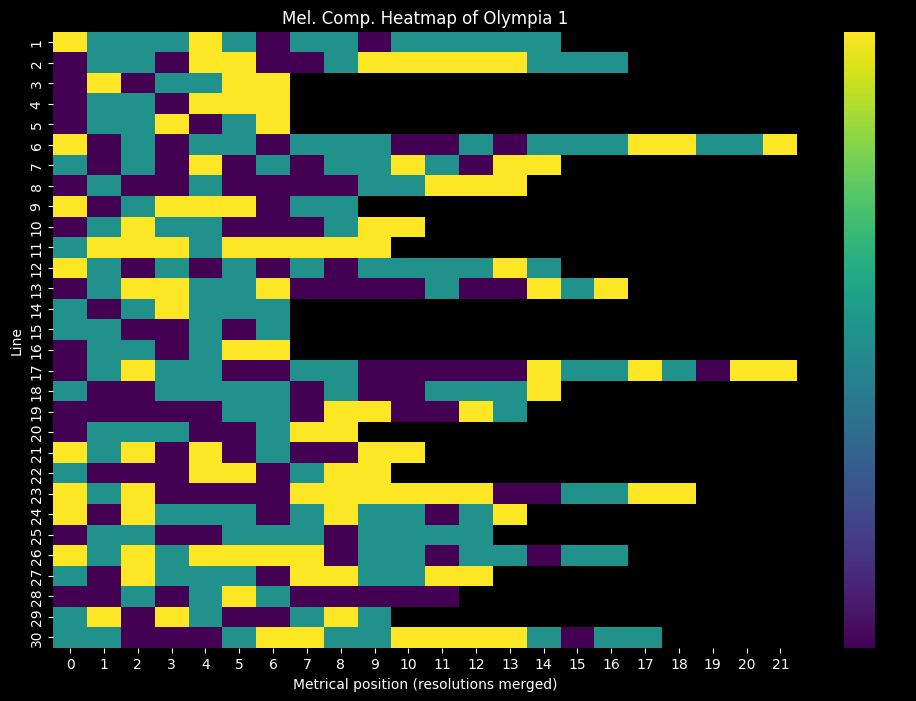

In [ ]:
from heatmaps import make_one_heatmap

make_one_heatmap("data/compiled/triads/ht_olympians_triads.xml", "ol01", "Mel. Comp. Heatmap of Olympia 1", representative_strophe=1, save=False, show=True, dark_mode=True, text_overlay=False)

Of course, we want to make individual heatmaps for each and every canticum in the corpus. 

Canticum IDs in Olympia: ['ol01', 'ol02', 'ol03', 'ol04', 'ol05', 'ol06', 'ol07', 'ol08', 'ol09', 'ol10', 'ol11', 'ol12', 'ol13']


  0%|          | 0/13 [00:00<?, ?it/s]

Generating heatmap for Olympia with responsion attribute ol01...
Length of each row (data matrix): [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10]
Number of rows: 11
Length of each row (text matrix): [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10]


  8%|▊         | 1/13 [00:00<00:07,  1.62it/s]

Skipping ol02 in Olympia (known data issue).
Generating heatmap for Olympia with responsion attribute ol03...
Length of each row (data matrix): [19, 12, 20, 24, 12]
Number of rows: 5
Length of each row (text matrix): [19, 12, 20, 24, 12]


 23%|██▎       | 3/13 [00:01<00:03,  2.95it/s]

Generating heatmap for Olympia with responsion attribute ol04...
Length of each row (data matrix): [21, 19, 10, 6, 16, 10, 19, 6, 12]
Number of rows: 9
Length of each row (text matrix): [21, 19, 10, 6, 16, 10, 19, 6, 12]


 31%|███       | 4/13 [00:01<00:03,  2.48it/s]

Generating heatmap for Olympia with responsion attribute ol05...
Length of each row (data matrix): [15, 18, 17]
Number of rows: 3
Length of each row (text matrix): [15, 18, 17]


 38%|███▊      | 5/13 [00:02<00:03,  2.44it/s]

Generating heatmap for Olympia with responsion attribute ol06...
Length of each row (data matrix): [16, 12, 12, 16, 14, 19, 20]
Number of rows: 7
Length of each row (text matrix): [16, 12, 12, 16, 14, 19, 20]


 46%|████▌     | 6/13 [00:02<00:03,  2.27it/s]

Generating heatmap for Olympia with responsion attribute ol07...
Length of each row (data matrix): [15, 11, 4, 24, 19, 16]
Number of rows: 6
Length of each row (text matrix): [15, 11, 4, 24, 19, 16]


 54%|█████▍    | 7/13 [00:03<00:02,  2.17it/s]

Generating heatmap for Olympia with responsion attribute ol08...
Length of each row (data matrix): [15, 13, 20, 11, 7, 7, 7]
Number of rows: 7
Length of each row (text matrix): [15, 13, 20, 11, 7, 7, 7]


 62%|██████▏   | 8/13 [00:03<00:02,  2.02it/s]

Generating heatmap for Olympia with responsion attribute ol09...
Length of each row (data matrix): [8, 18, 14, 14, 14, 15, 8, 6, 10, 14]
Number of rows: 10
Length of each row (text matrix): [8, 18, 14, 14, 14, 15, 8, 6, 10, 14]


 69%|██████▉   | 9/13 [00:04<00:02,  1.98it/s]

Generating heatmap for Olympia with responsion attribute ol10...
Length of each row (data matrix): [12, 10, 28, 10, 7, 8]
Number of rows: 6
Length of each row (text matrix): [12, 10, 28, 10, 7, 8]


 77%|███████▋  | 10/13 [00:04<00:01,  2.02it/s]

Generating heatmap for Olympia with responsion attribute ol11...
Length of each row (data matrix): [12, 11, 8, 16, 7, 15]
Number of rows: 6
Length of each row (text matrix): [12, 11, 8, 16, 7, 15]


 85%|████████▍ | 11/13 [00:05<00:00,  2.07it/s]

Generating heatmap for Olympia with responsion attribute ol12...
Length of each row (data matrix): [11, 16, 11, 12, 12, 23]
Number of rows: 6
Length of each row (text matrix): [11, 16, 11, 12, 12, 23]


 92%|█████████▏| 12/13 [00:05<00:00,  2.10it/s]

Generating heatmap for Olympia with responsion attribute ol13...
Length of each row (data matrix): [7, 11, 11, 10, 12, 22, 17, 11]
Number of rows: 8
Length of each row (text matrix): [7, 11, 11, 10, 12, 22, 17, 11]


100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Canticum IDs in Pythia: ['py01', 'py02', 'py03', 'py04', 'py05', 'py07', 'py08', 'py09', 'py10', 'py11']


  0%|          | 0/10 [00:00<?, ?it/s]

Generating heatmap for Pythia with responsion attribute py01...
Length of each row (data matrix): [15, 21, 9, 23, 11, 30]
Number of rows: 6
Length of each row (text matrix): [15, 21, 9, 23, 11, 30]


 10%|█         | 1/10 [00:00<00:05,  1.74it/s]

Generating heatmap for Pythia with responsion attribute py02...
Length of each row (data matrix): [16, 22, 14, 19, 12, 15, 14, 20]
Number of rows: 8
Length of each row (text matrix): [16, 22, 14, 19, 12, 15, 14, 20]


 20%|██        | 2/10 [00:01<00:04,  1.65it/s]

Generating heatmap for Pythia with responsion attribute py03...
Length of each row (data matrix): [11, 19, 8, 26, 15, 18, 12]
Number of rows: 7
Length of each row (text matrix): [11, 19, 8, 26, 15, 18, 12]


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

Generating heatmap for Pythia with responsion attribute py04...
Length of each row (data matrix): [11, 23, 20, 15, 15, 18, 14, 8]
Number of rows: 8
Length of each row (text matrix): [11, 23, 20, 15, 15, 18, 14, 8]


 40%|████      | 4/10 [00:02<00:03,  1.67it/s]

Generating heatmap for Pythia with responsion attribute py05...
Length of each row (data matrix): [7, 12, 17, 7, 7, 5, 10, 10, 10, 14, 10]
Number of rows: 11
Length of each row (text matrix): [7, 12, 17, 7, 7, 5, 10, 10, 10, 14, 10]


 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

Generating heatmap for Pythia with responsion attribute py07...
Length of each row (data matrix): [13, 15, 5, 6, 10, 7, 6, 6]
Number of rows: 8
Length of each row (text matrix): [11, 15, 5, 6, 10, 7, 6, 6]


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

Generating heatmap for Pythia with responsion attribute py08...
Length of each row (data matrix): [9, 9, 7, 10, 14, 14, 10]
Number of rows: 7
Length of each row (text matrix): [9, 9, 7, 10, 14, 14, 10]


 70%|███████   | 7/10 [00:03<00:01,  1.98it/s]

Generating heatmap for Pythia with responsion attribute py09...
Length of each row (data matrix): [12, 9, 12, 16, 23, 15, 9, 14, 16]
Number of rows: 9
Length of each row (text matrix): [12, 9, 12, 16, 23, 15, 9, 14, 16]


 80%|████████  | 8/10 [00:04<00:01,  1.95it/s]/Users/albin/git/responsio-accentuum/heatmaps.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


Generating heatmap for Pythia with responsion attribute py10...
Length of each row (data matrix): [7, 16, 14, 22, 13, 14]
Number of rows: 6
Length of each row (text matrix): [7, 16, 14, 22, 13, 14]


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

Generating heatmap for Pythia with responsion attribute py11...
Length of each row (data matrix): [17, 19, 12, 15, 14]
Number of rows: 5
Length of each row (text matrix): [17, 19, 12, 15, 14]


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


Canticum IDs in Nemea: ['ne01', 'ne03', 'ne05', 'ne06', 'ne07', 'ne08', 'ne10', 'ne11']


  0%|          | 0/8 [00:00<?, ?it/s]

Generating heatmap for Nemea with responsion attribute ne01...
Length of each row (data matrix): [8, 12, 7, 12, 7, 18, 26]
Number of rows: 7
Length of each row (text matrix): [8, 12, 7, 12, 7, 18, 26]


 12%|█▎        | 1/8 [00:00<00:03,  1.99it/s]

Generating heatmap for Nemea with responsion attribute ne03...
Length of each row (data matrix): [15, 16, 15, 15, 14, 10, 13, 15]
Number of rows: 8
Length of each row (text matrix): [15, 16, 15, 15, 14, 10, 13, 15]


 25%|██▌       | 2/8 [00:01<00:03,  1.98it/s]

Generating heatmap for Nemea with responsion attribute ne05...
Length of each row (data matrix): [27, 20, 11, 12, 12, 17]
Number of rows: 6
Length of each row (text matrix): [27, 20, 11, 12, 12, 17]


 38%|███▊      | 3/8 [00:01<00:02,  1.99it/s]

Generating heatmap for Nemea with responsion attribute ne06...
Length of each row (data matrix): [15, 16, 20, 17, 10, 17, 4, 11]
Number of rows: 8
Length of each row (text matrix): [15, 16, 20, 17, 10, 17, 4, 11]


 50%|█████     | 4/8 [00:02<00:02,  1.98it/s]

Generating heatmap for Nemea with responsion attribute ne07...
Length of each row (data matrix): [13, 22, 13, 16, 13, 16, 13, 16]
Number of rows: 8
Length of each row (text matrix): [13, 22, 13, 16, 13, 16, 13, 16]


 62%|██████▎   | 5/8 [00:02<00:01,  1.95it/s]

Generating heatmap for Nemea with responsion attribute ne08...
Length of each row (data matrix): [19, 16, 19, 18, 15]
Number of rows: 5
Length of each row (text matrix): [19, 16, 19, 18, 15]


 75%|███████▌  | 6/8 [00:03<00:01,  1.74it/s]

Generating heatmap for Nemea with responsion attribute ne10...
Length of each row (data matrix): [20, 19, 11, 15, 19, 22]
Number of rows: 6
Length of each row (text matrix): [20, 19, 11, 15, 19, 22]


 88%|████████▊ | 7/8 [00:03<00:00,  1.77it/s]

Generating heatmap for Nemea with responsion attribute ne11...
Length of each row (data matrix): [15, 16, 15, 11, 15]
Number of rows: 5
Length of each row (text matrix): [15, 16, 15, 11, 15]


100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Canticum IDs in Isthmia: ['is01', 'is02', 'is03', 'is04', 'is05', 'is06']


  0%|          | 0/6 [00:00<?, ?it/s]

Generating heatmap for Isthmia with responsion attribute is01...
Length of each row (data matrix): [12, 11, 12, 7, 12, 22]
Number of rows: 6
Length of each row (text matrix): [12, 11, 12, 7, 12, 22]


 17%|█▋        | 1/6 [00:00<00:02,  2.08it/s]

Generating heatmap for Isthmia with responsion attribute is02...
Length of each row (data matrix): [16, 18, 16, 12, 12]
Number of rows: 5
Length of each row (text matrix): [16, 18, 16, 12, 12]


 33%|███▎      | 2/6 [00:00<00:01,  2.20it/s]

Generating heatmap for Isthmia with responsion attribute is03...
Length of each row (data matrix): [16, 15, 12, 12, 22, 12]
Number of rows: 6
Length of each row (text matrix): [16, 15, 12, 12, 22, 12]


 50%|█████     | 3/6 [00:01<00:01,  2.17it/s]

Generating heatmap for Isthmia with responsion attribute is04...
Length of each row (data matrix): [12, 13, 12, 7, 12, 25]
Number of rows: 6
Length of each row (text matrix): [12, 13, 12, 7, 12, 25]


 67%|██████▋   | 4/6 [00:02<00:01,  1.89it/s]

Generating heatmap for Isthmia with responsion attribute is05...
Length of each row (data matrix): [12, 12, 23, 11, 8, 16, 12, 16, 9]
Number of rows: 9
Length of each row (text matrix): [12, 12, 23, 11, 8, 16, 12, 16, 9]


 83%|████████▎ | 5/6 [00:02<00:00,  1.89it/s]

Generating heatmap for Isthmia with responsion attribute is06...
Length of each row (data matrix): [11, 14, 12, 10, 28]
Number of rows: 5
Length of each row (text matrix): [11, 14, 12, 10, 28]


100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

36


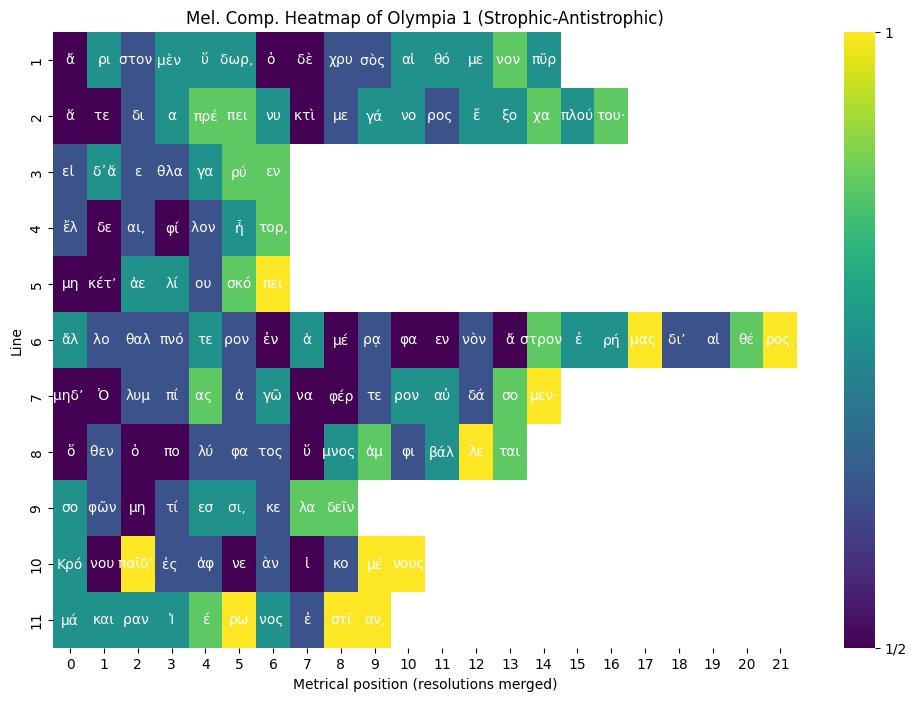

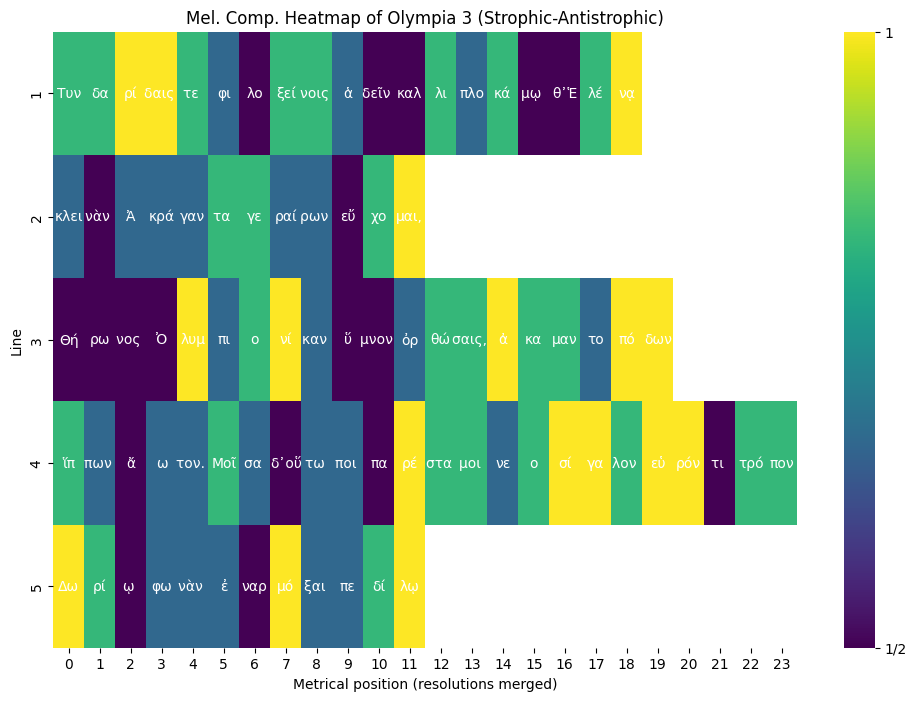

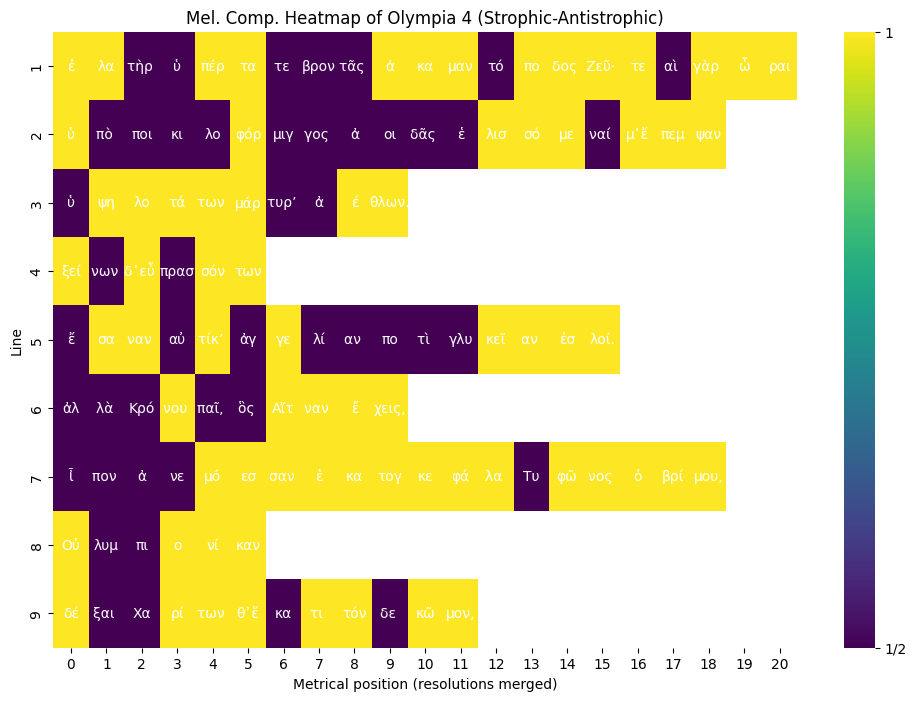

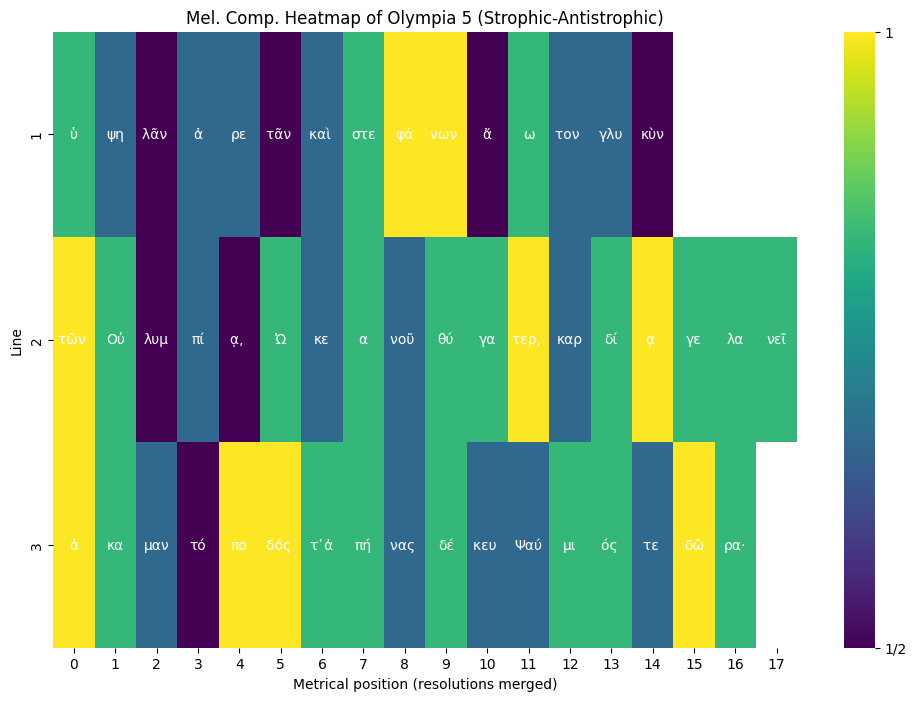

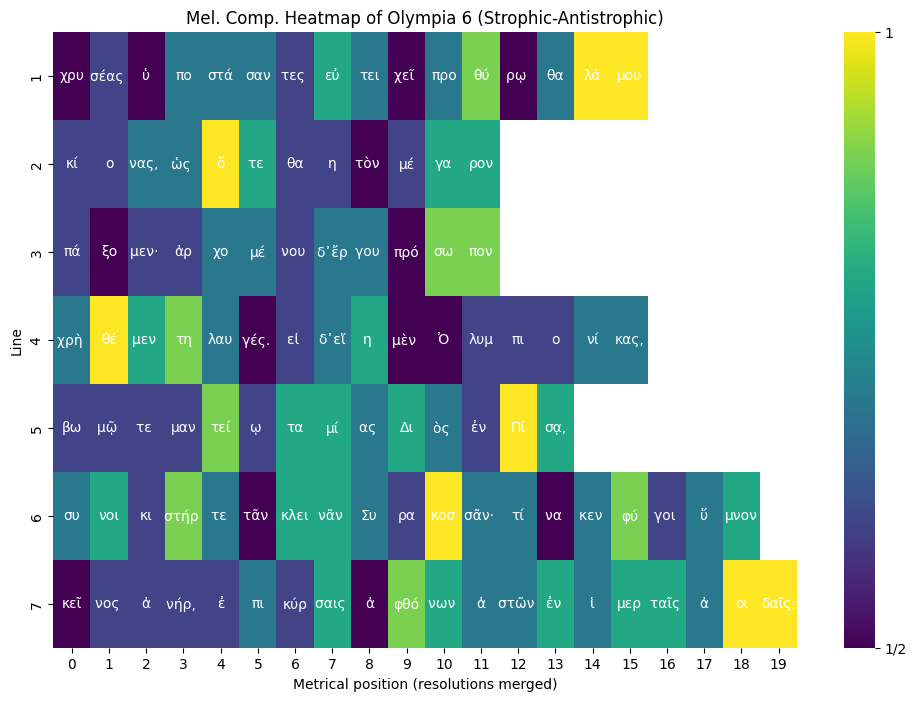

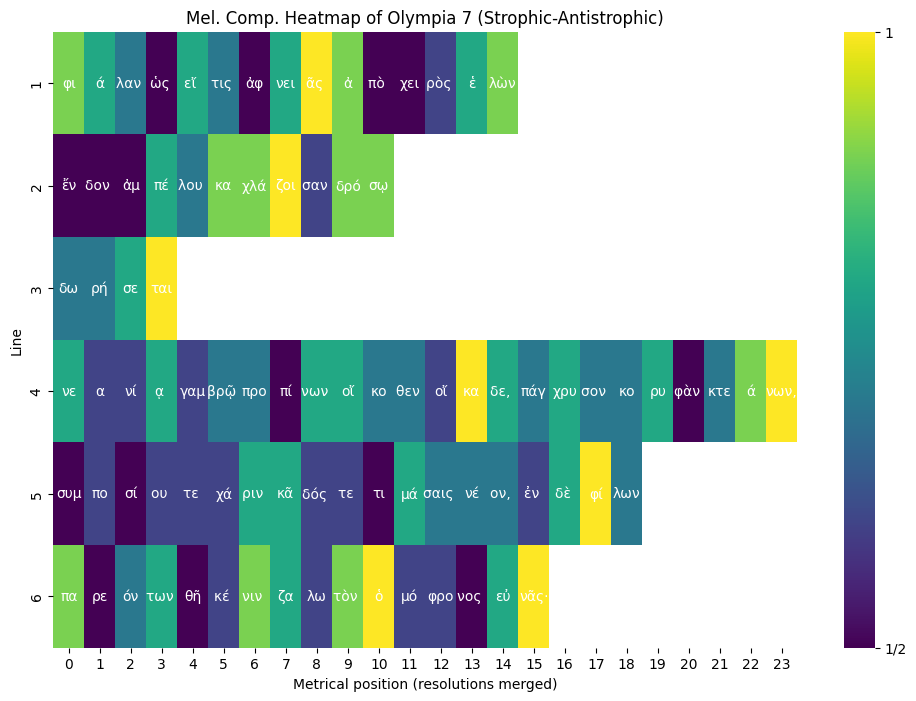

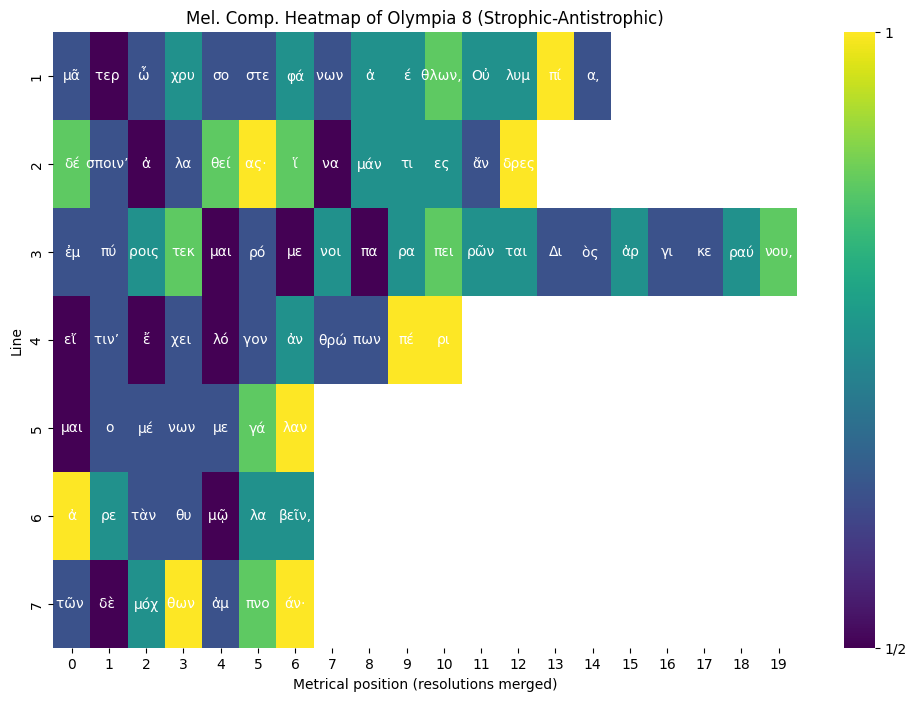

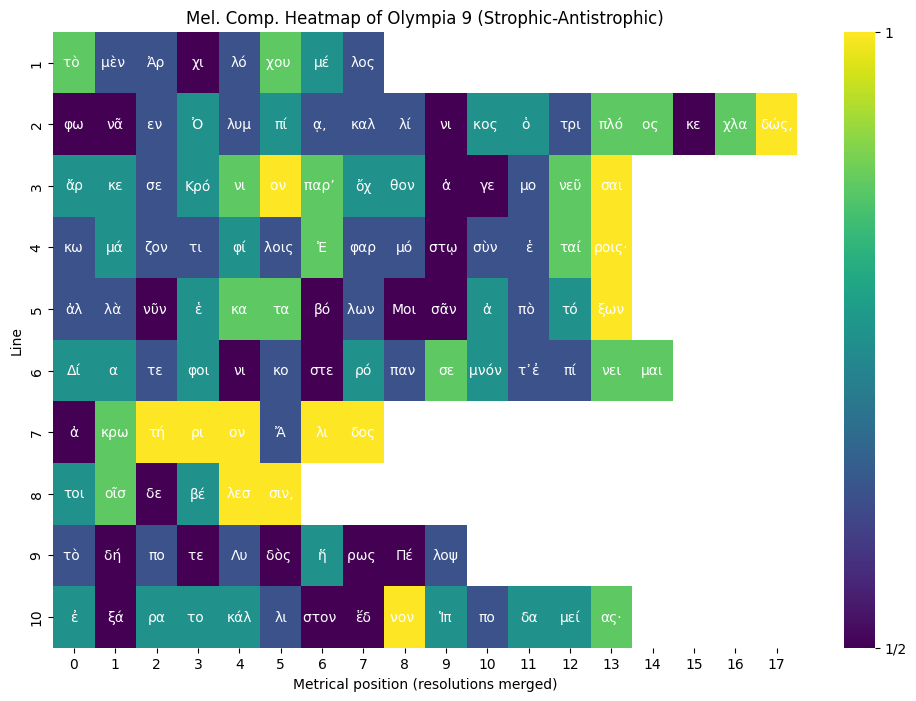

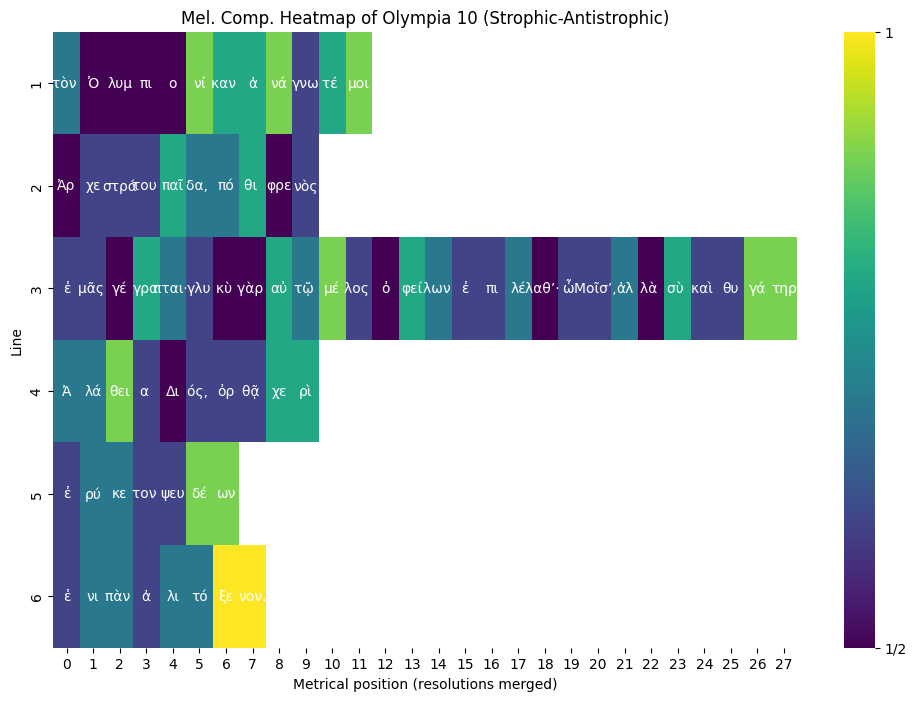

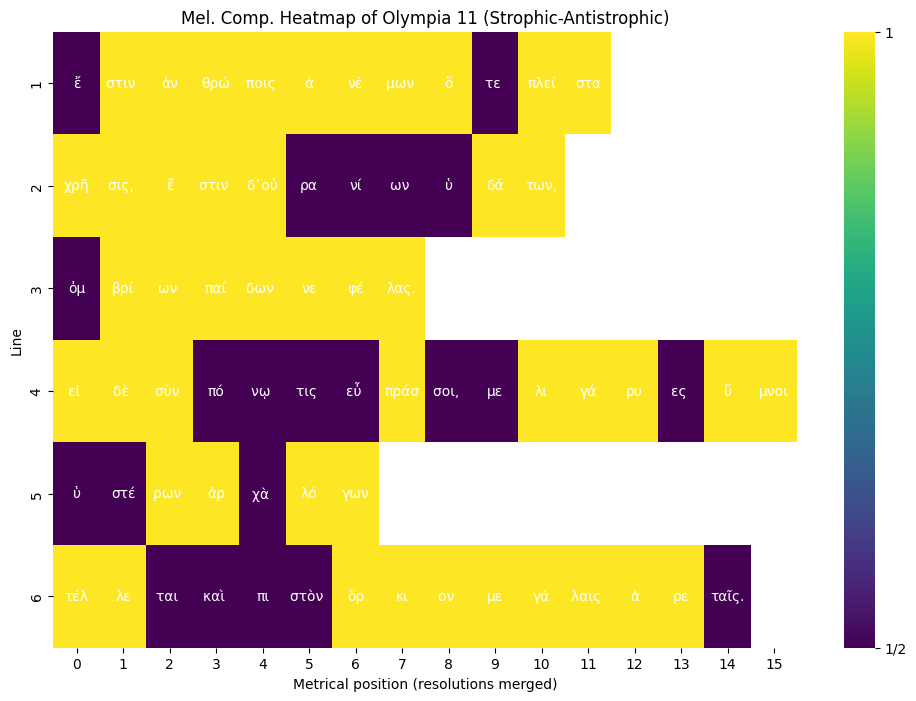

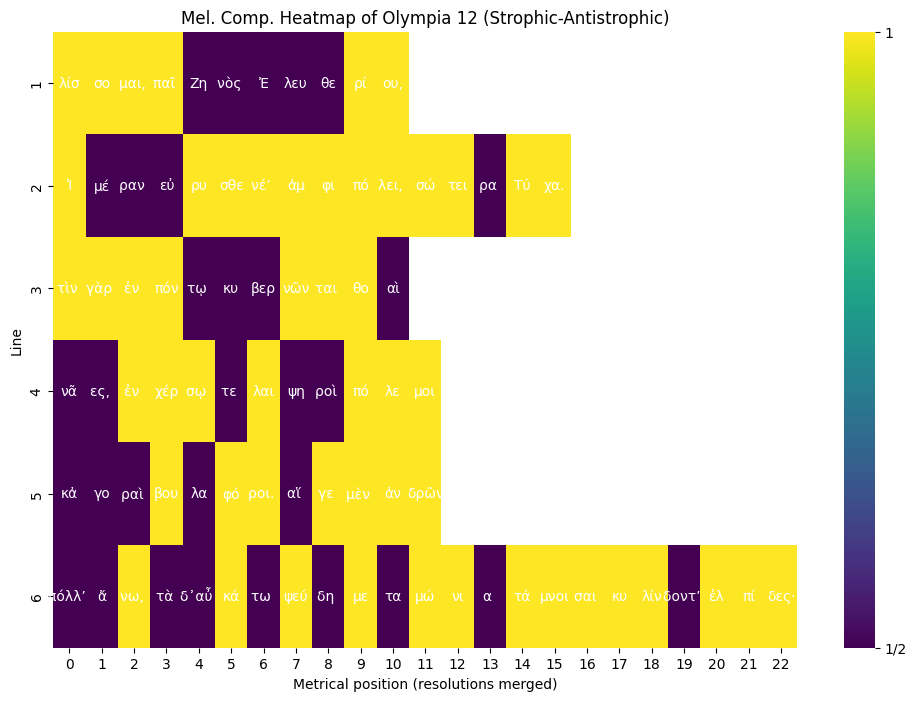

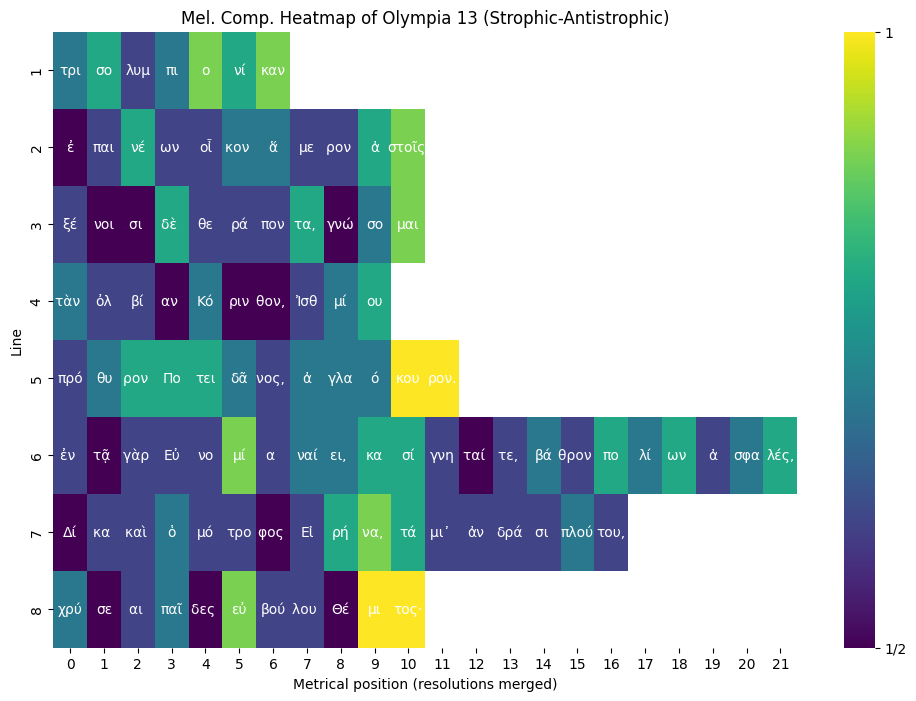

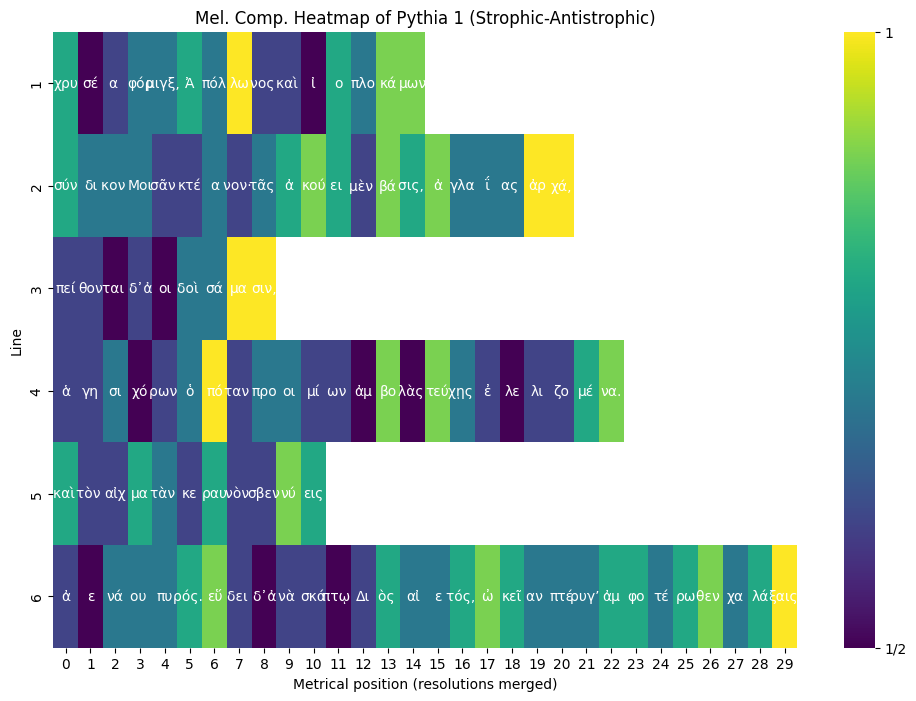

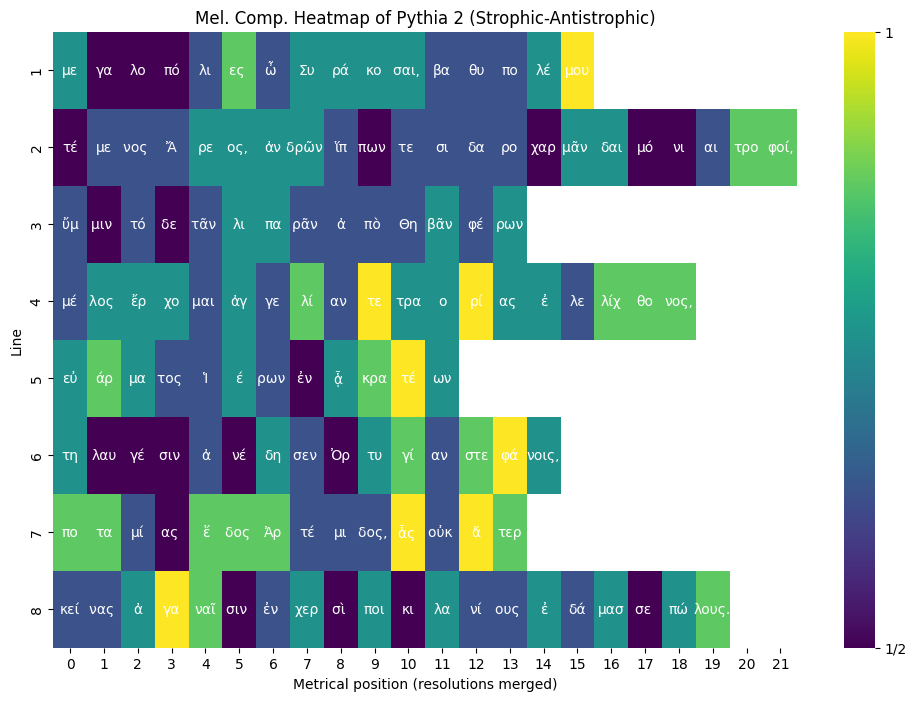

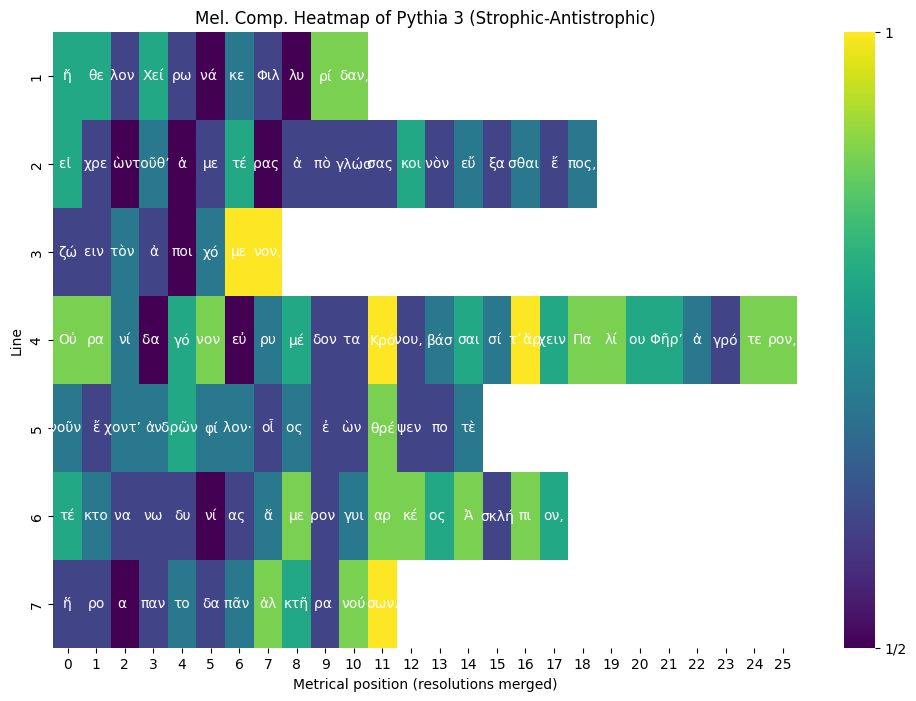

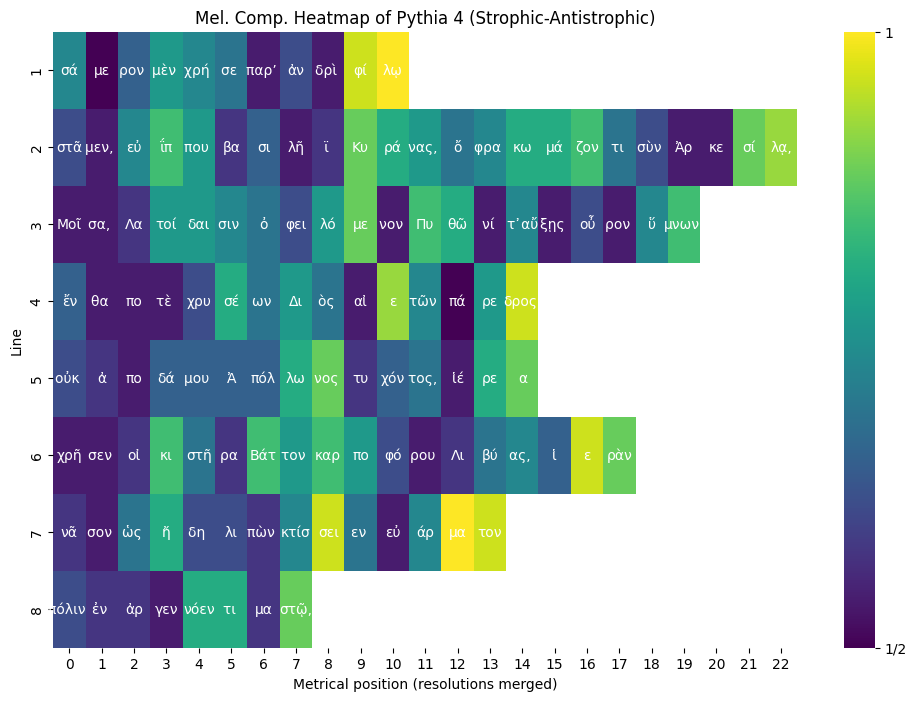

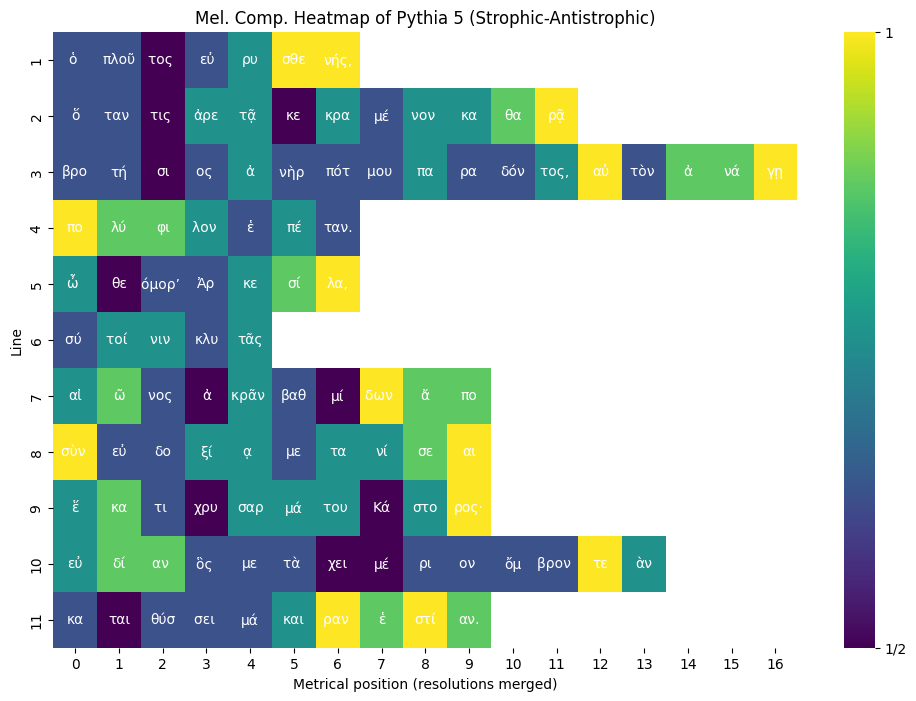

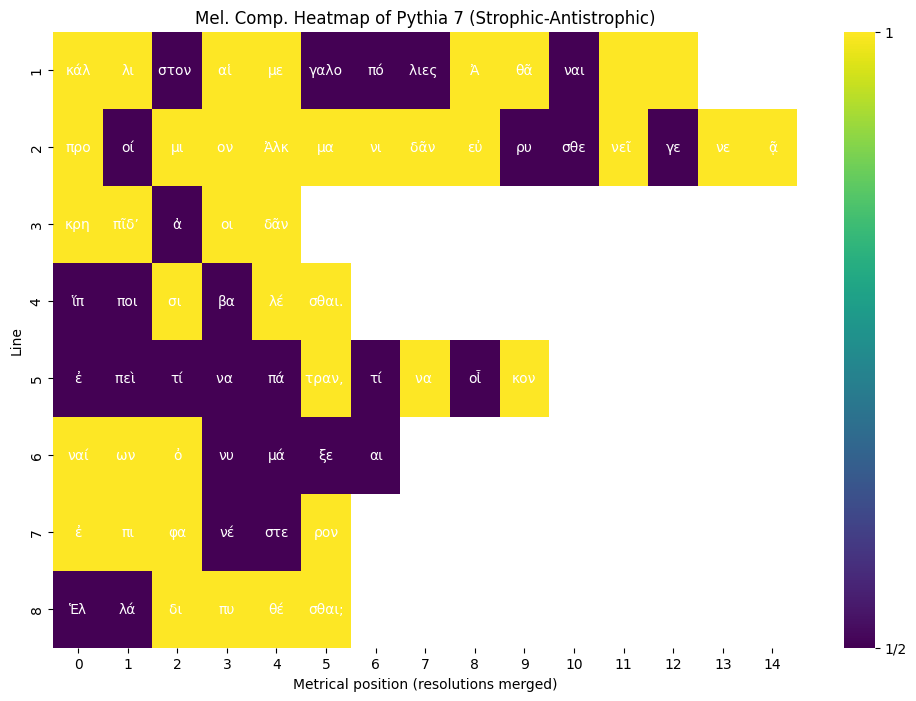

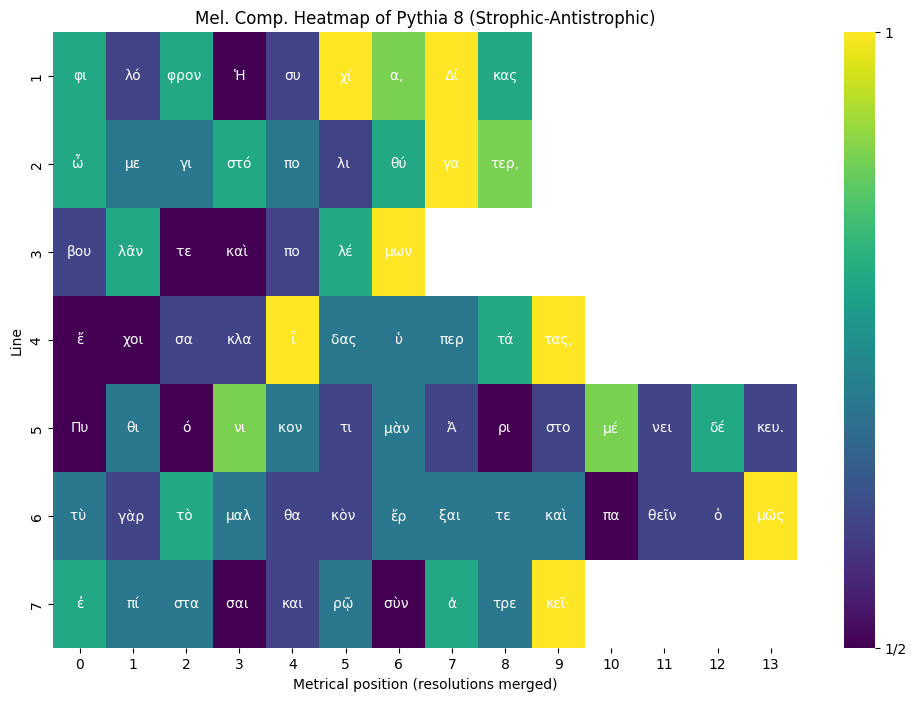

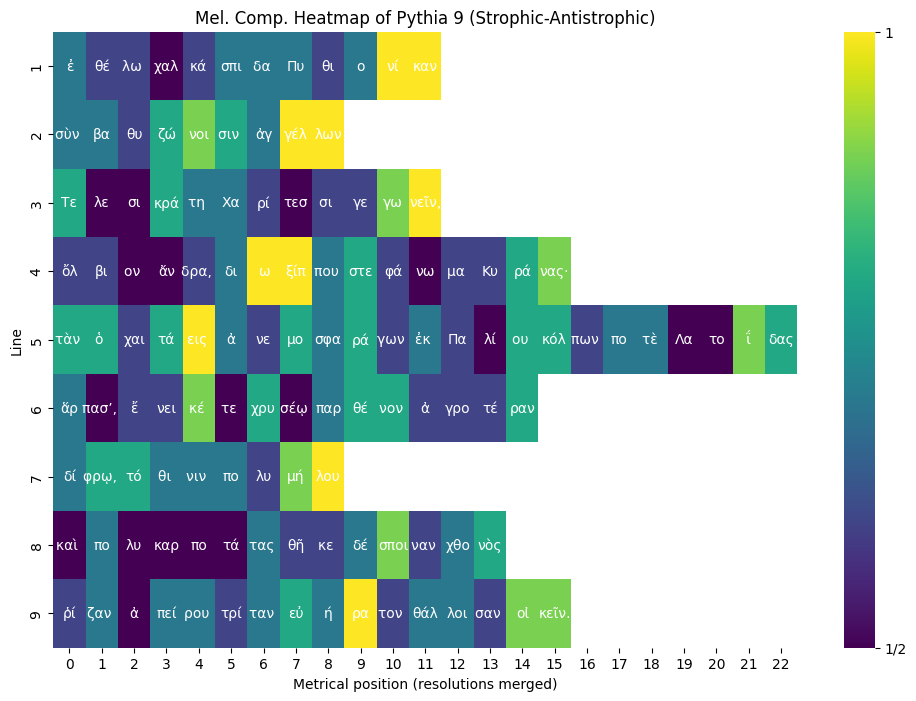

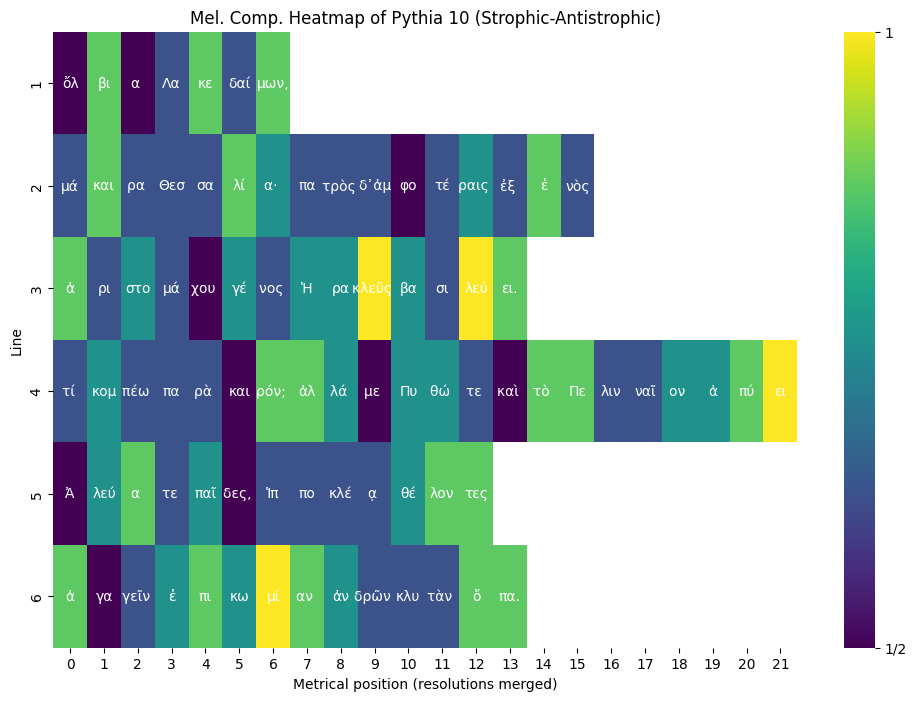

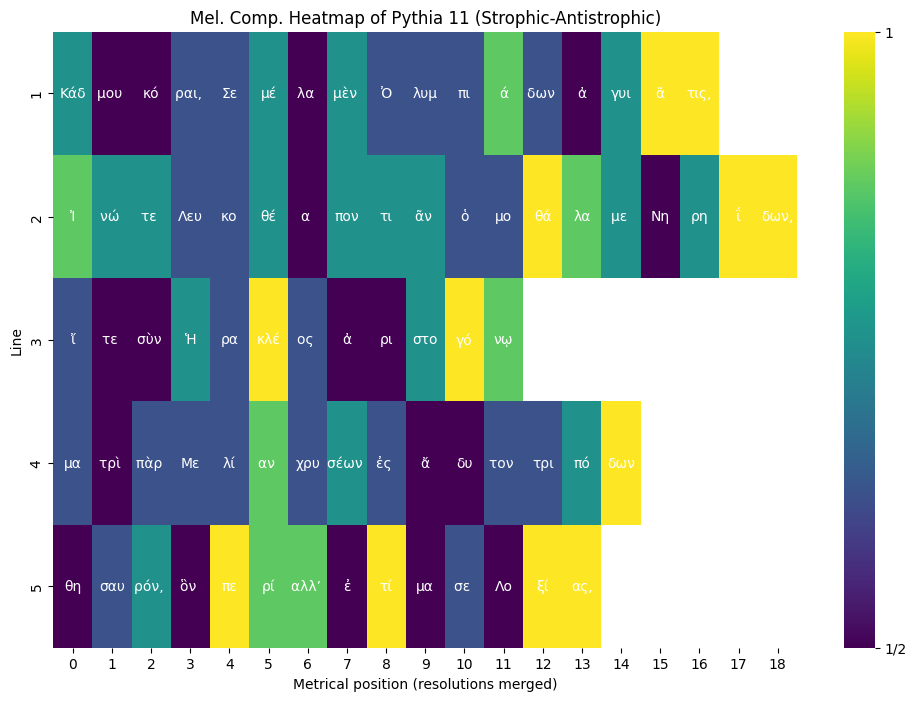

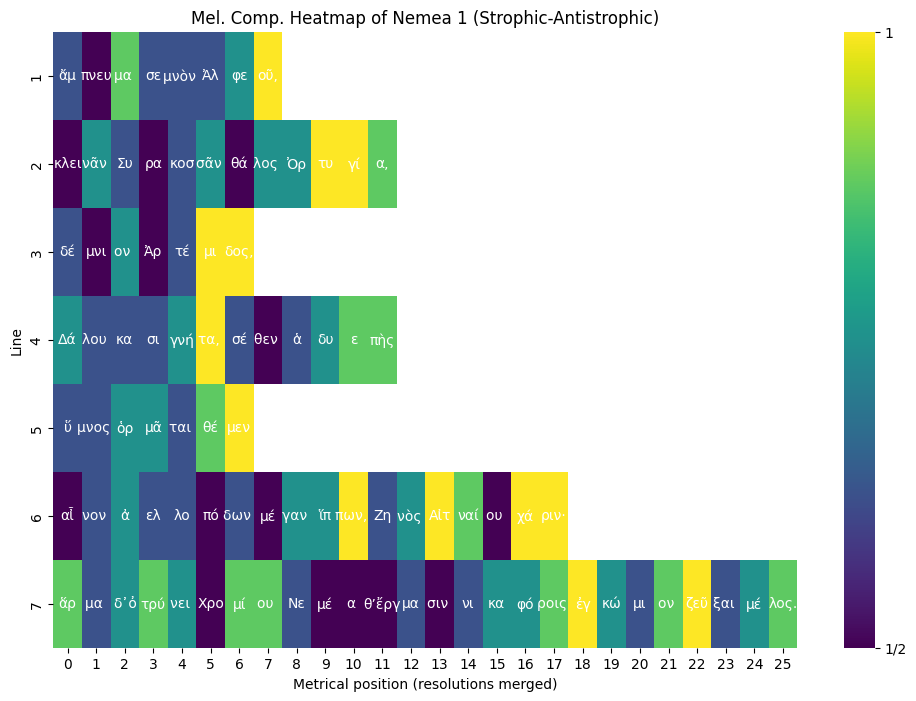

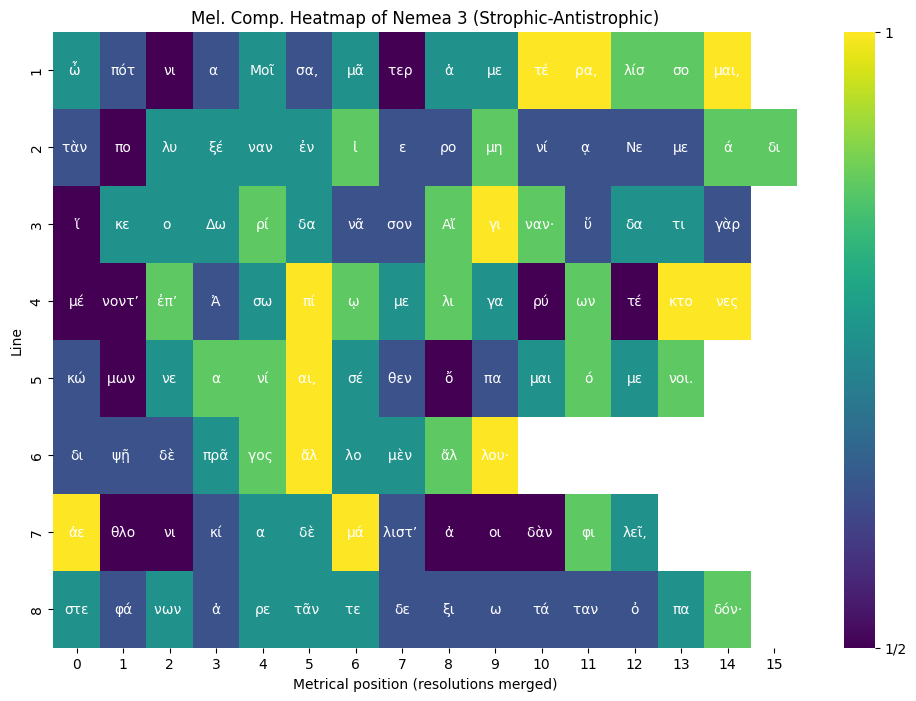

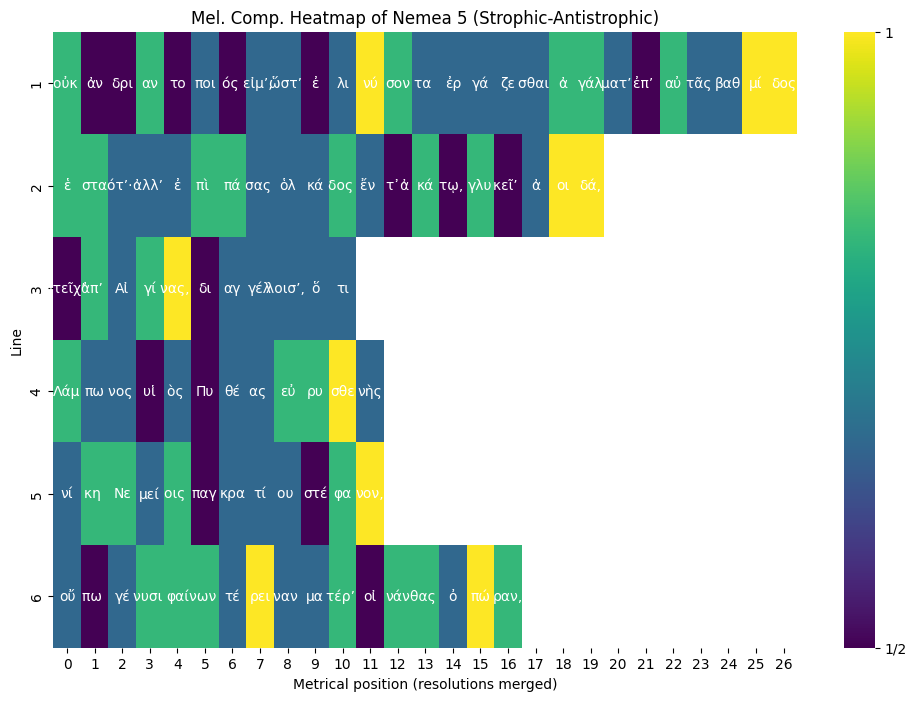

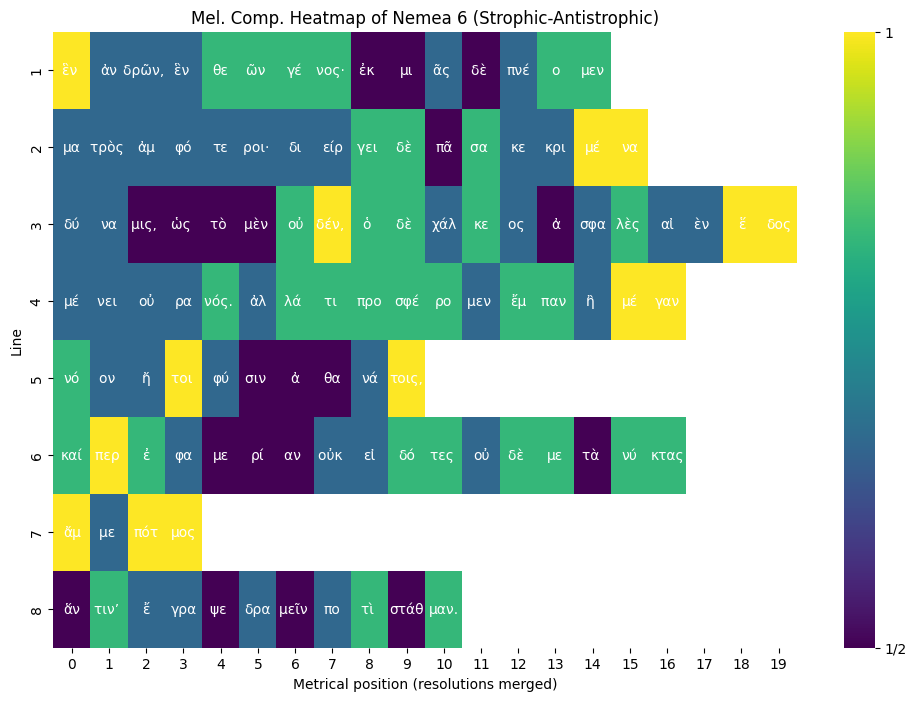

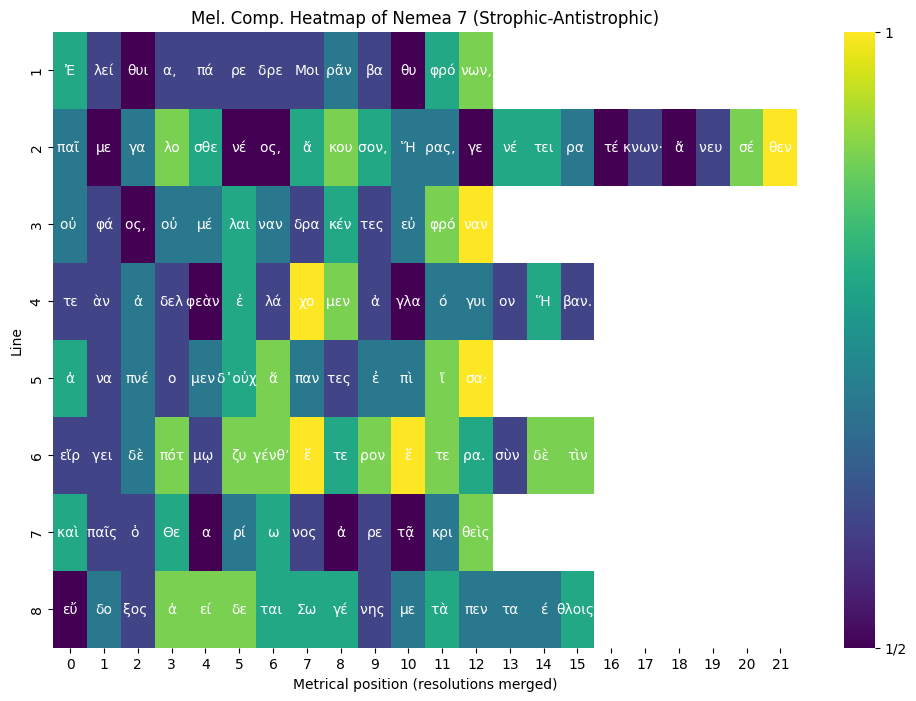

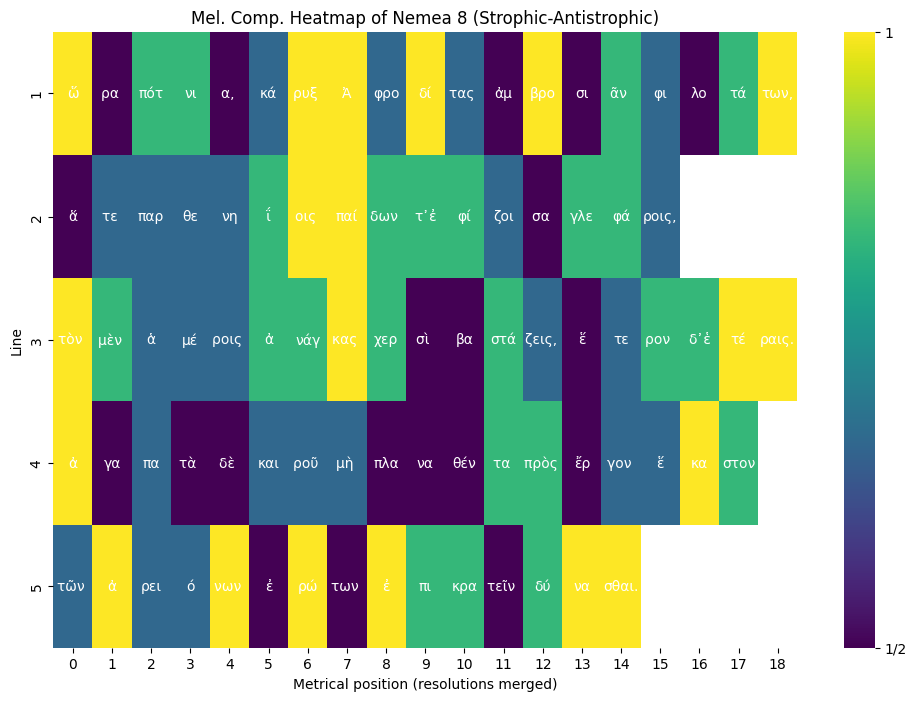

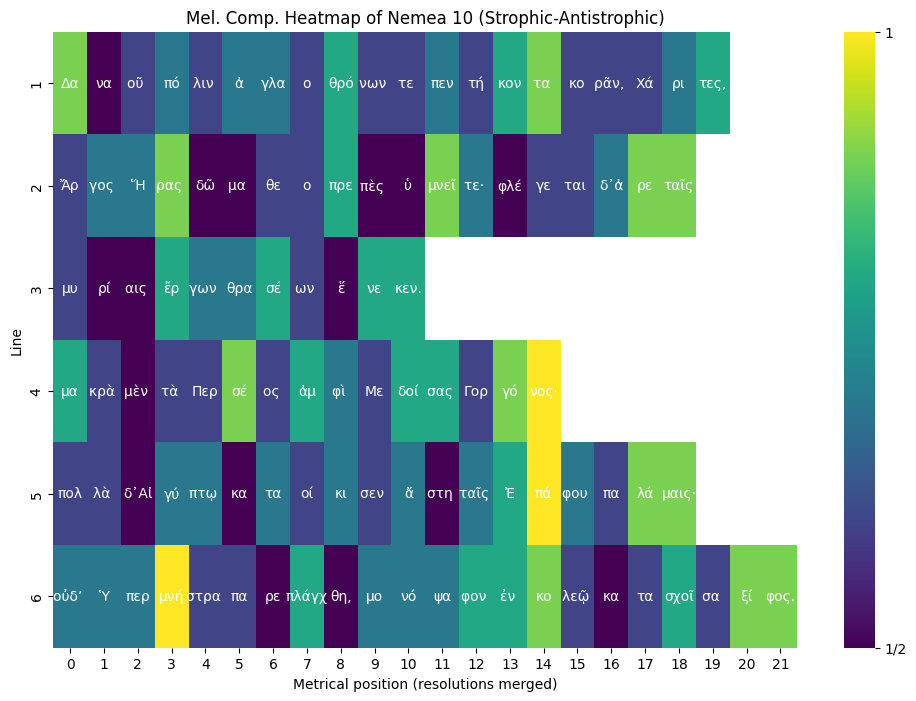

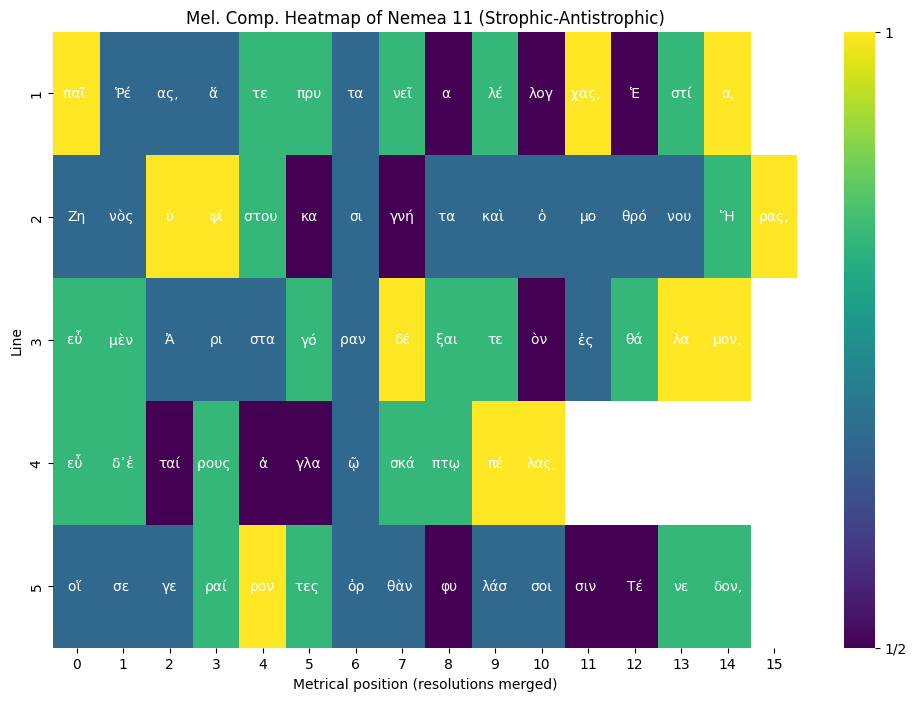

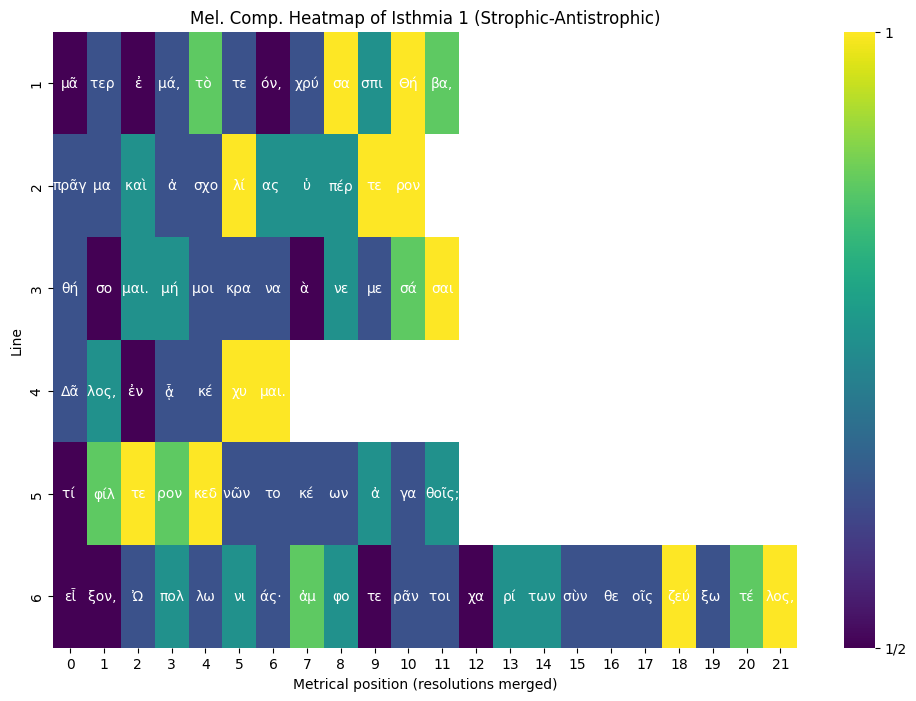

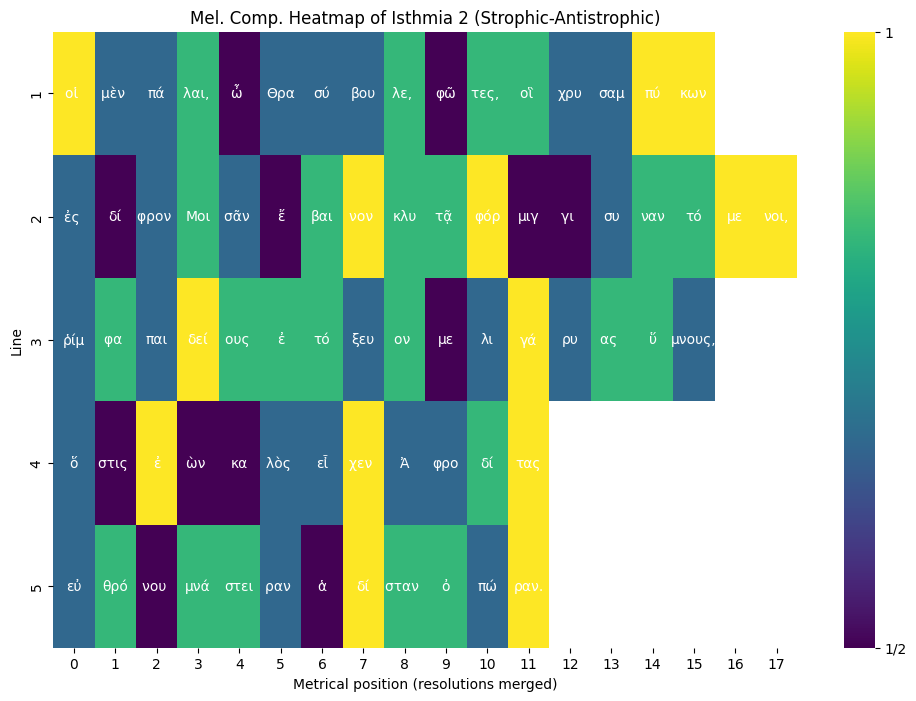

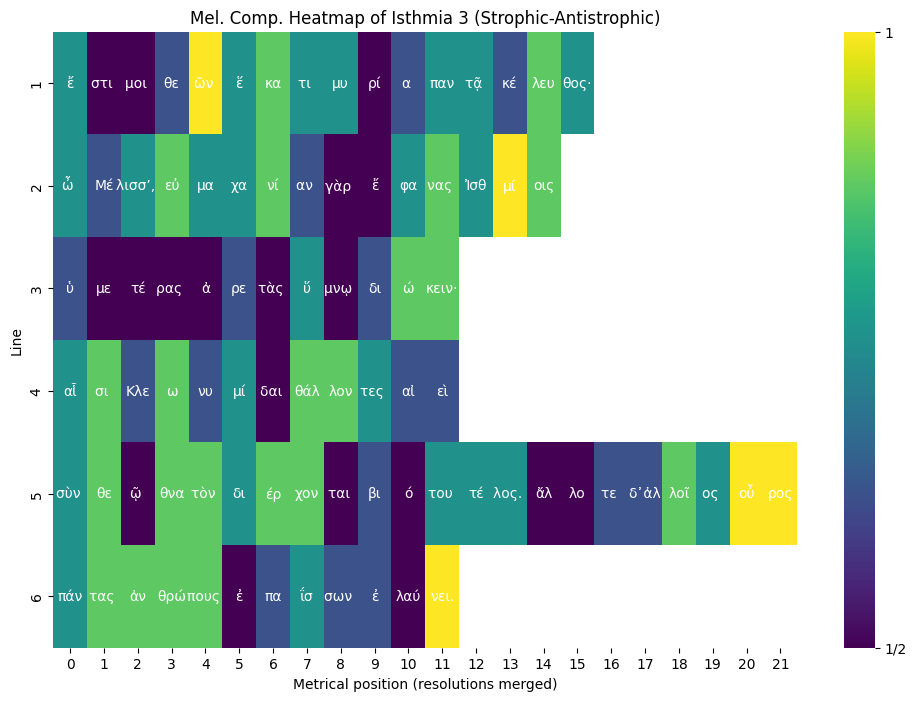

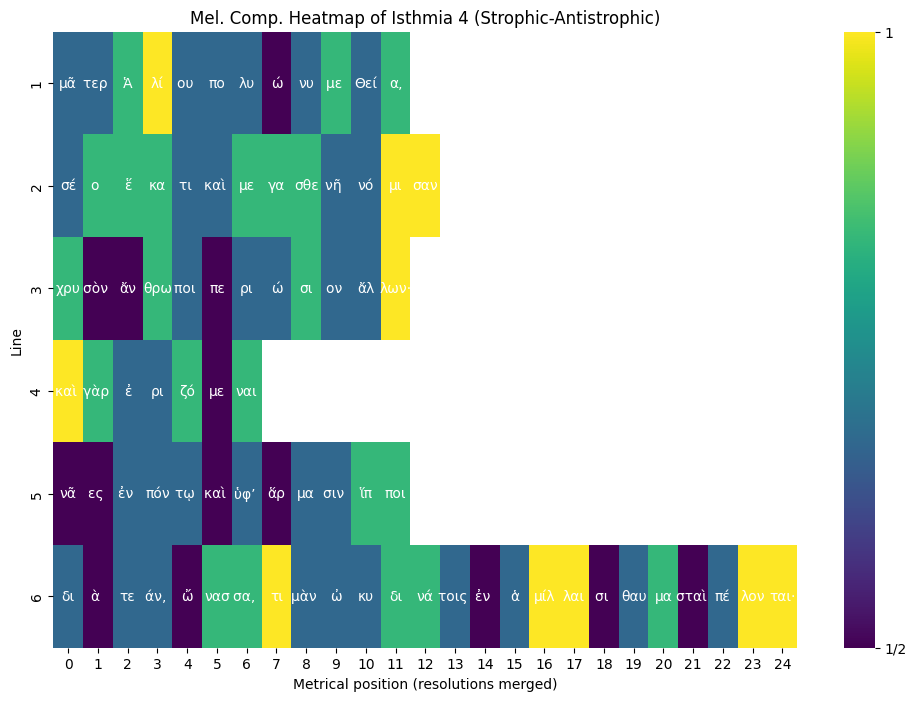

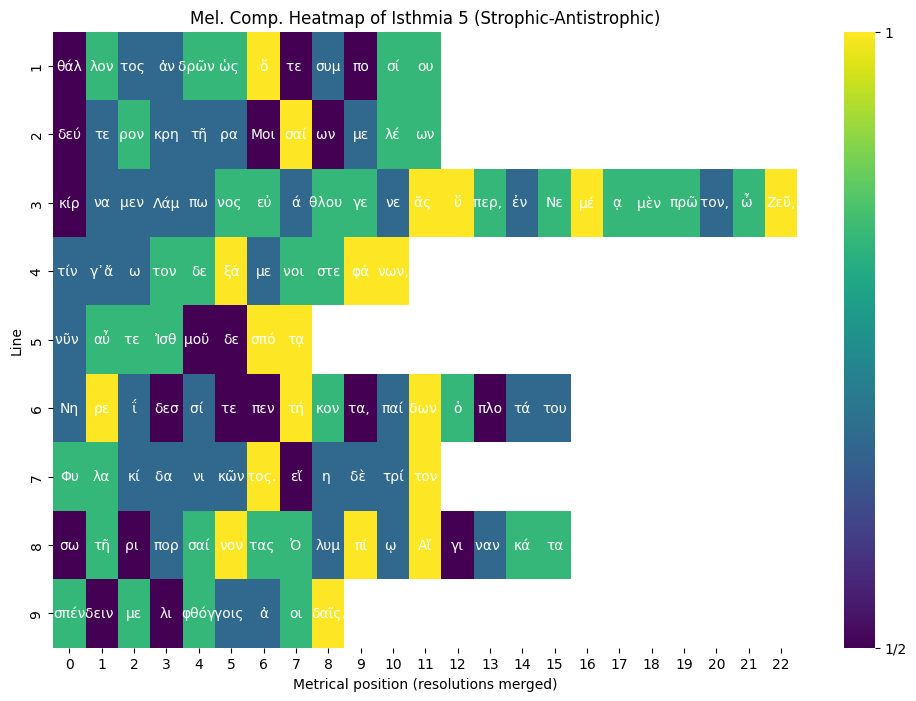

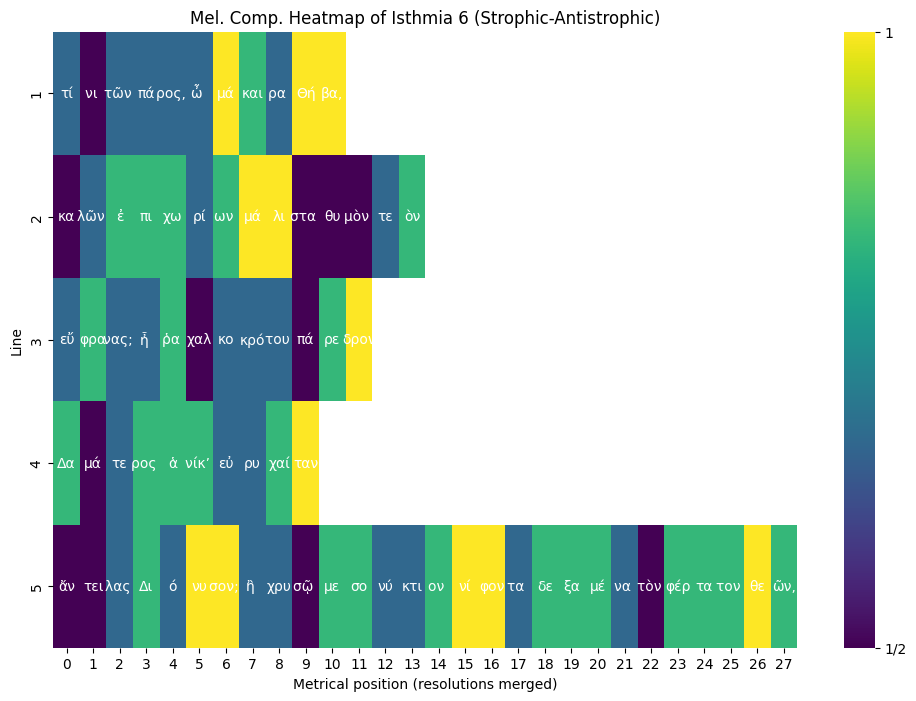

In [4]:
import os
from tqdm import tqdm

from src.utils.utils import get_canticum_ids
from heatmaps import canticum_with_at_least_two_strophes, make_one_heatmap

 ###### SETTINGS ######

responding_unit = "strophes"  # "triads", "strophes"
overlay = True
dark = not overlay

make_assert = False

#######################

folder = f"data/compiled/{responding_unit}/"

if overlay:
    out_folder = f"media/heatmaps/{responding_unit}/text/"
else:
    out_folder = f"media/heatmaps/{responding_unit}/notext/"

groups = [[f"ht_olympians_{responding_unit}.xml", "Olympia"], [f"ht_pythians_{responding_unit}.xml", "Pythia"], [f"ht_nemeans_{responding_unit}.xml", "Nemea"], [f"ht_isthmians_{responding_unit}.xml", "Isthmia"]]
for group in groups:
    xml_path = os.path.join(folder, group[0])
    responsion_attributes = get_canticum_ids(xml_path)
    print(f"Canticum IDs in {group[1]}: {responsion_attributes}")

    for responsion_attribute in tqdm(responsion_attributes):
        if not canticum_with_at_least_two_strophes(xml_path, responsion_attribute):
            print(f"Skipping {responsion_attribute} in {group[1]} (less than 2 strophes).")
            continue
        
        if responsion_attribute == "ol02":
            print(f"Skipping {responsion_attribute} in {group[1]} (known data issue).")
            continue

        print(f"Generating heatmap for {group[1]} with responsion attribute {responsion_attribute}...")

        number = int(responsion_attribute[2:])
        if responding_unit == "strophes":
            title = f"Mel. Comp. Heatmap of {group[1]} {number} (Strophic-Antistrophic)"
        else:
            title = f"Mel. Comp. Heatmap of {group[1]} {number}"
        make_one_heatmap(xml_path, out_folder, responsion_attribute, title, representative_strophe=1, save=True, show=False, dark_mode=dark, text_overlay=overlay)

print(len(os.listdir(out_folder)))
if make_assert:
    assert len(os.listdir(out_folder)) == 40

A nice way to compare two heatmaps is to make a gif with Pillow:

In [ ]:
from PIL import Image

png_files = [
    "media/plots/heatmaps/is04.png",
    "media/plots/heatmaps/is04_eric.png"
]

frames = [Image.open(f).convert("P", palette=Image.ADAPTIVE, colors=256) for f in png_files]

frames[0].save(
    "conj_is04.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,  # ms
    loop=0,
    optimize=False
)

### Poster

A striking aesthetic effect can be achieved by removing all text, a good fit for posters:

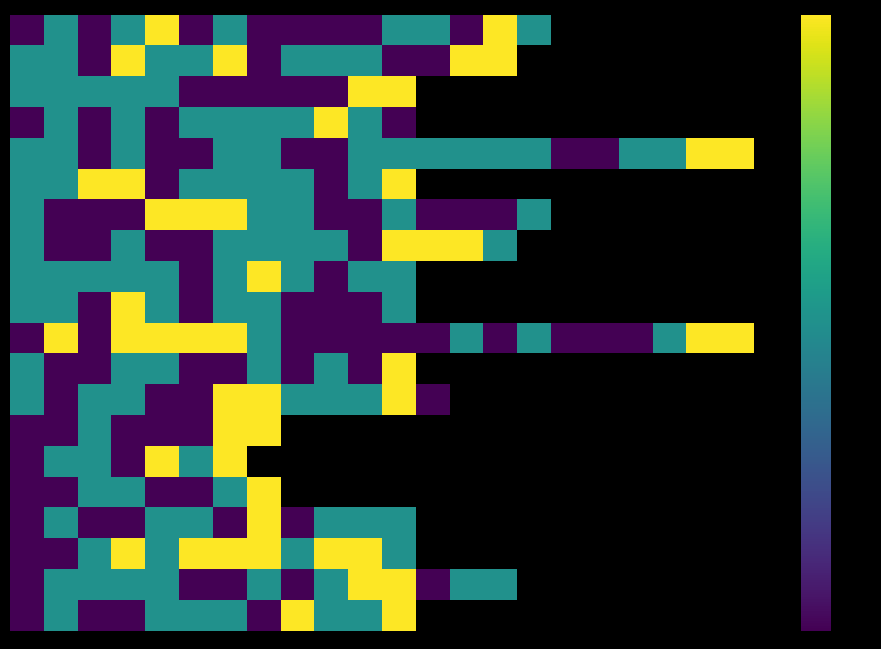

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_play, compatibility_canticum

#data = compatibility_play('data/compiled/py04.xml')
data = compatibility_canticum('data/compiled/triads/ht_isthmians_triads.xml', "is04")

data_matrix = data

num_rows_data = len(data_matrix)
max_len_data = max(len(row) for row in data_matrix)

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row

# -----------------------------
# Plot heatmap (dark mode, no text overlay)
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data, 
    cmap="viridis", 
    mask=np.isnan(padded_data), 
    cbar=True,
    vmax = 1
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# plt.xlabel("Metrical position (resolutions merged)")
# plt.ylabel("Line number (Snell-Maehler)")
# plt.title("Melodic-Comp. Heatmap of Pythia 4")
# plt.yticks(
#     ticks=np.arange(len(data_matrix)) + 0.5,
#     labels=np.arange(1, len(data_matrix)+1)
# )
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png", dpi=600)
plt.show()

## Set of heatmaps

### Olympians 

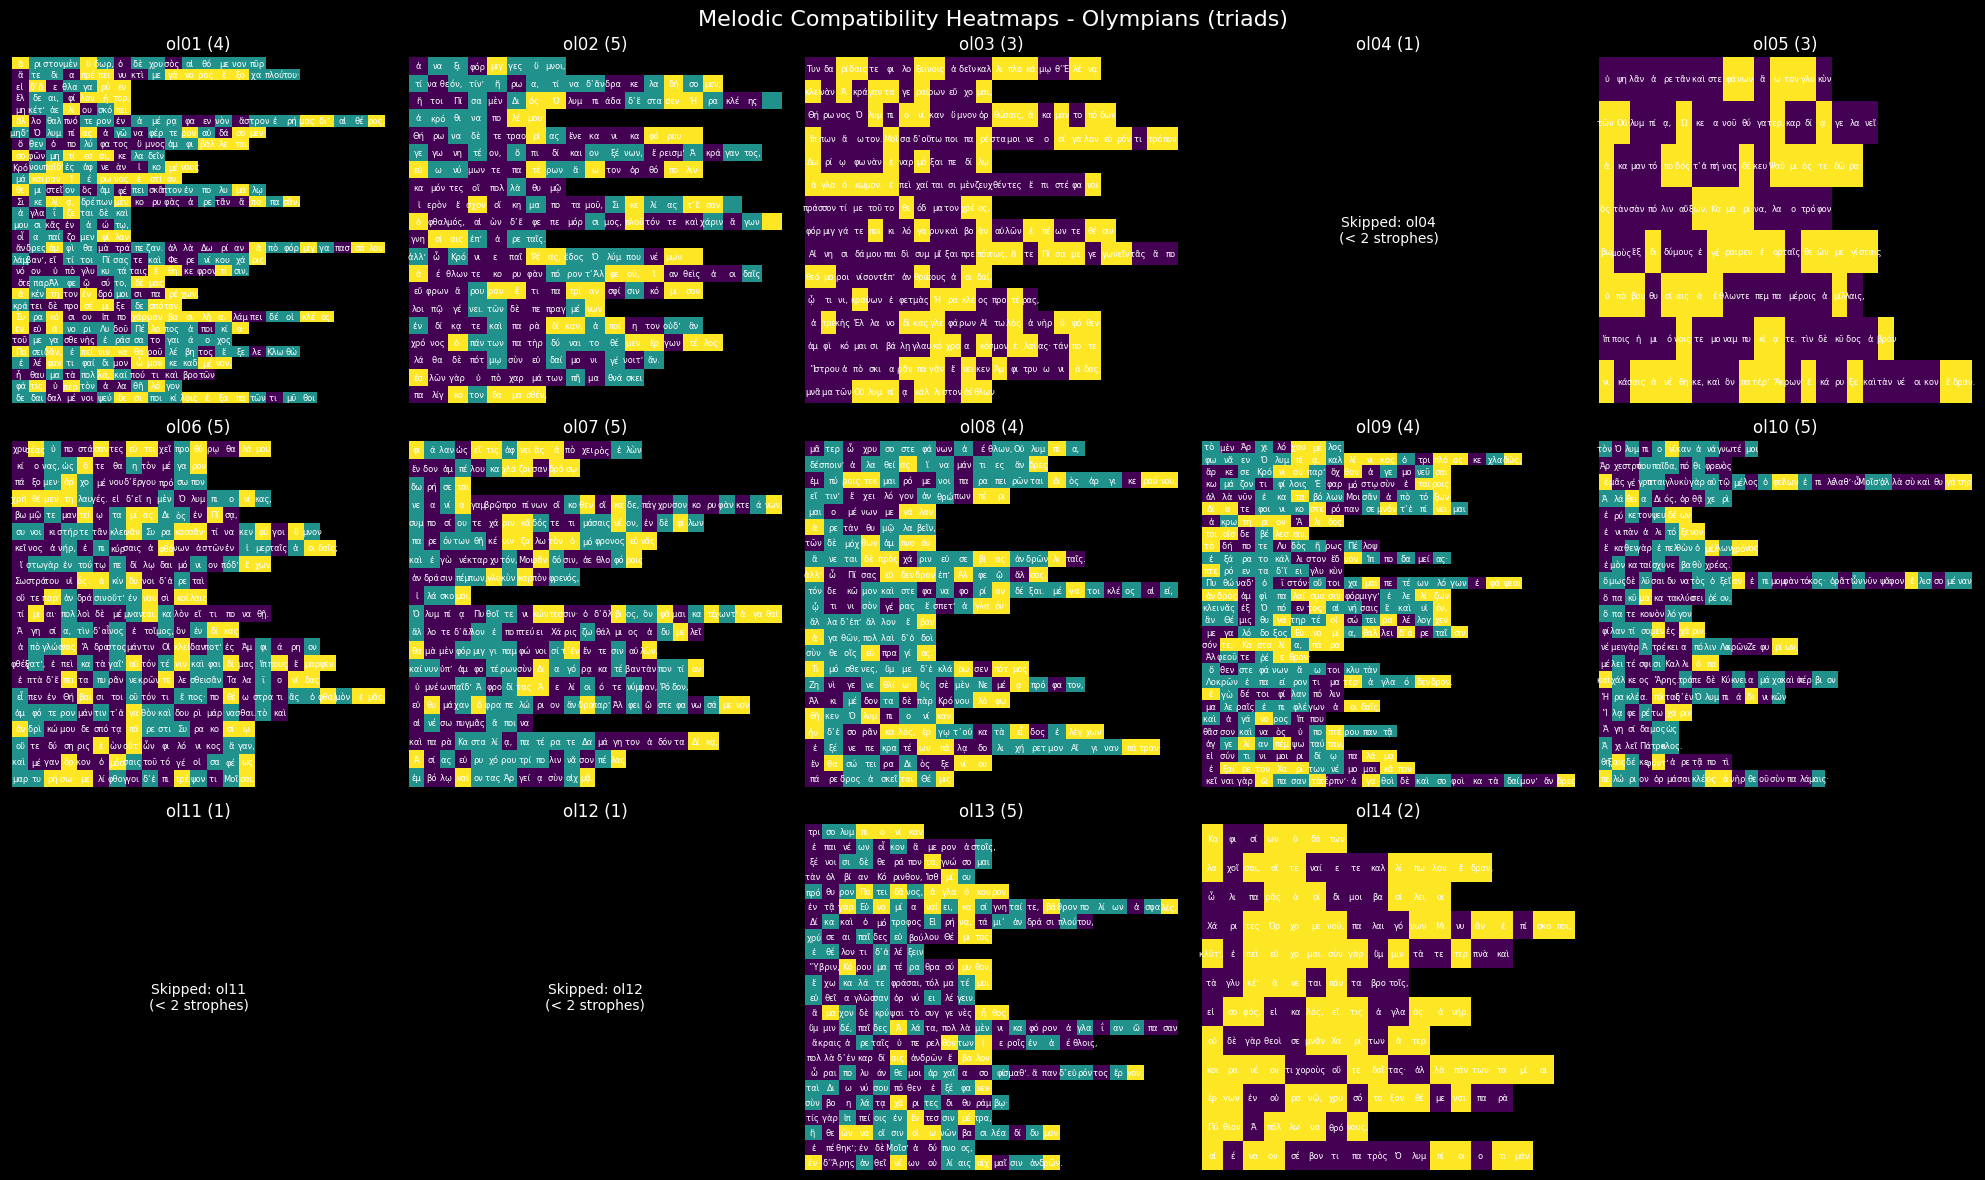

In [1]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/triads/ht_olympians_triads.xml', prefix="ol", suptitle="Melodic Compatibility Heatmaps - Olympians (triads)")

### Isthmians

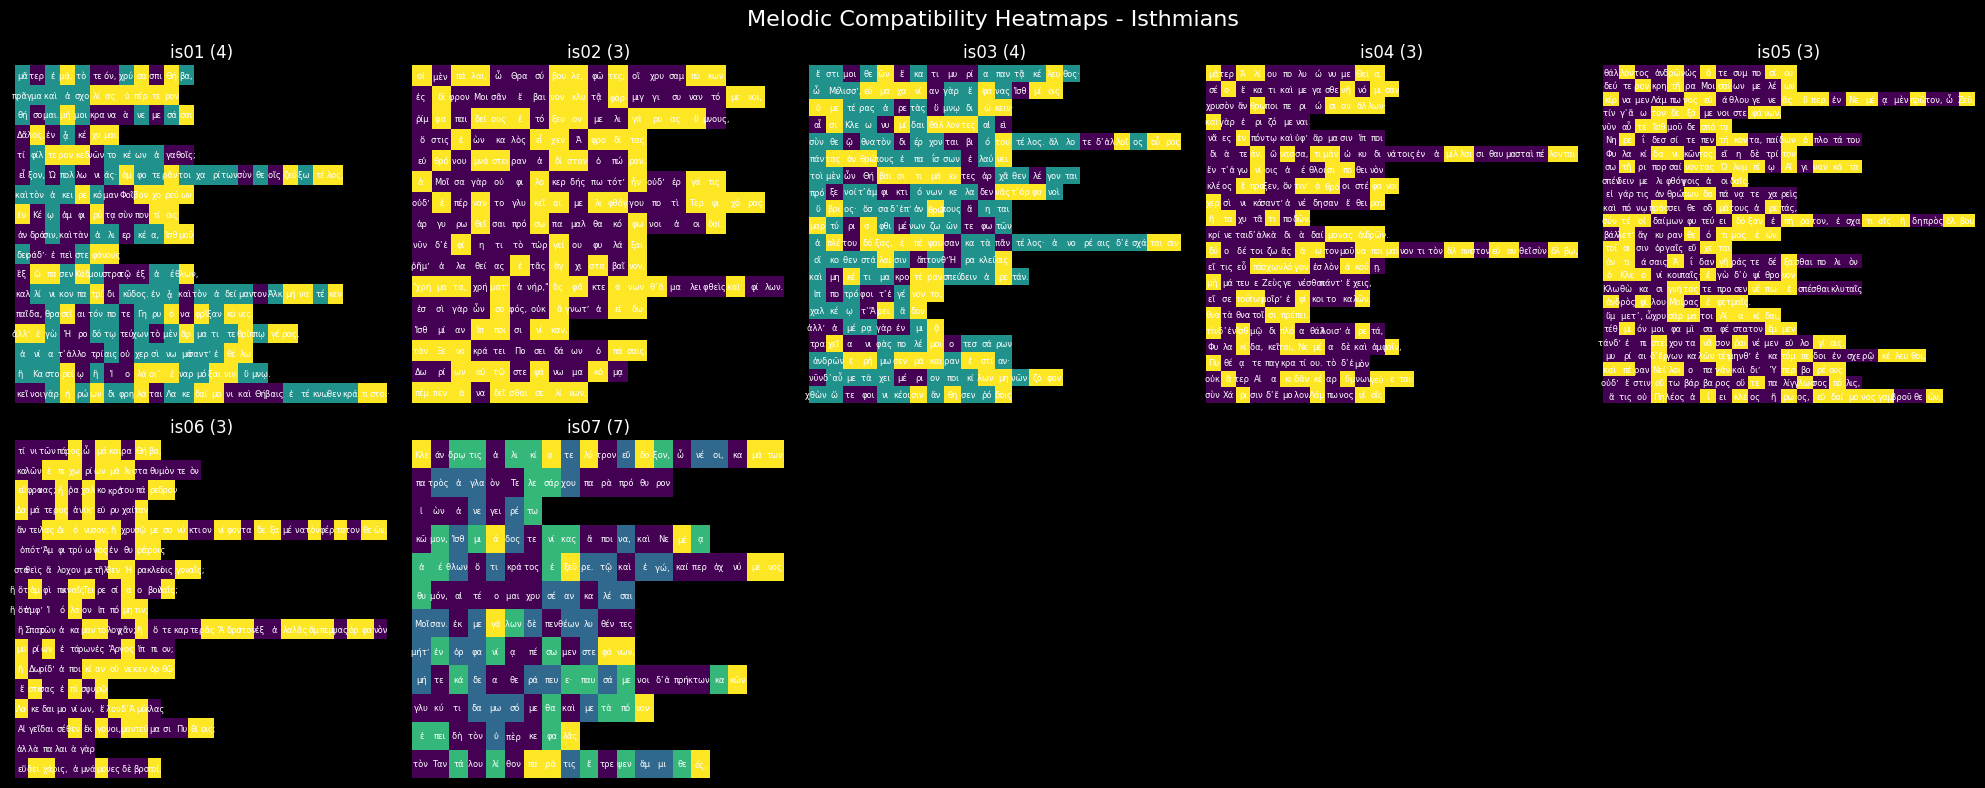

In [1]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_isthmians_triads.xml', prefix="is", suptitle="Melodic Compatibility Heatmaps - Isthmians")

### Nemeans

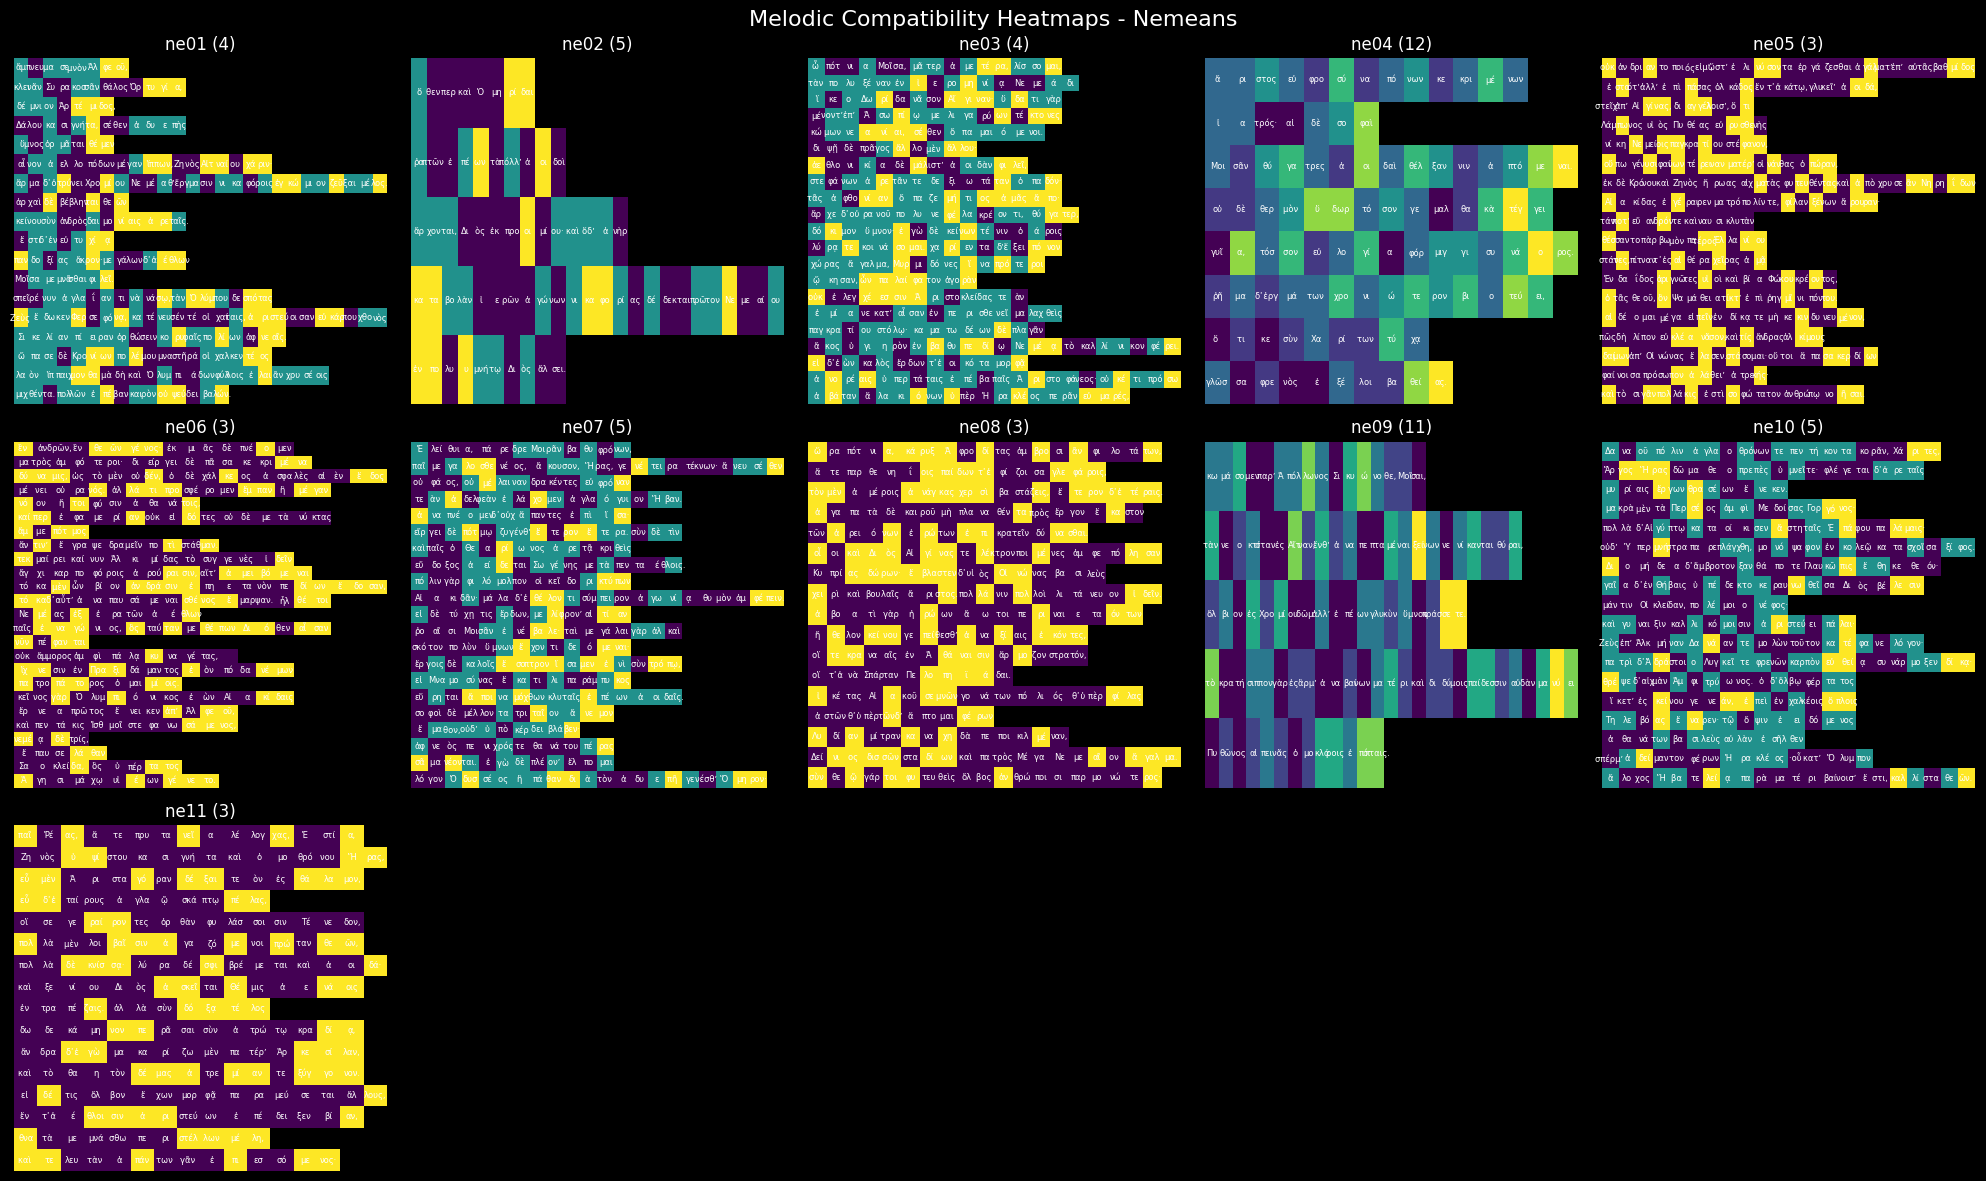

In [ ]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_nemeans_triads.xml', prefix="ne", suptitle="Melodic Compatibility Heatmaps - Nemeans")

### Pythians

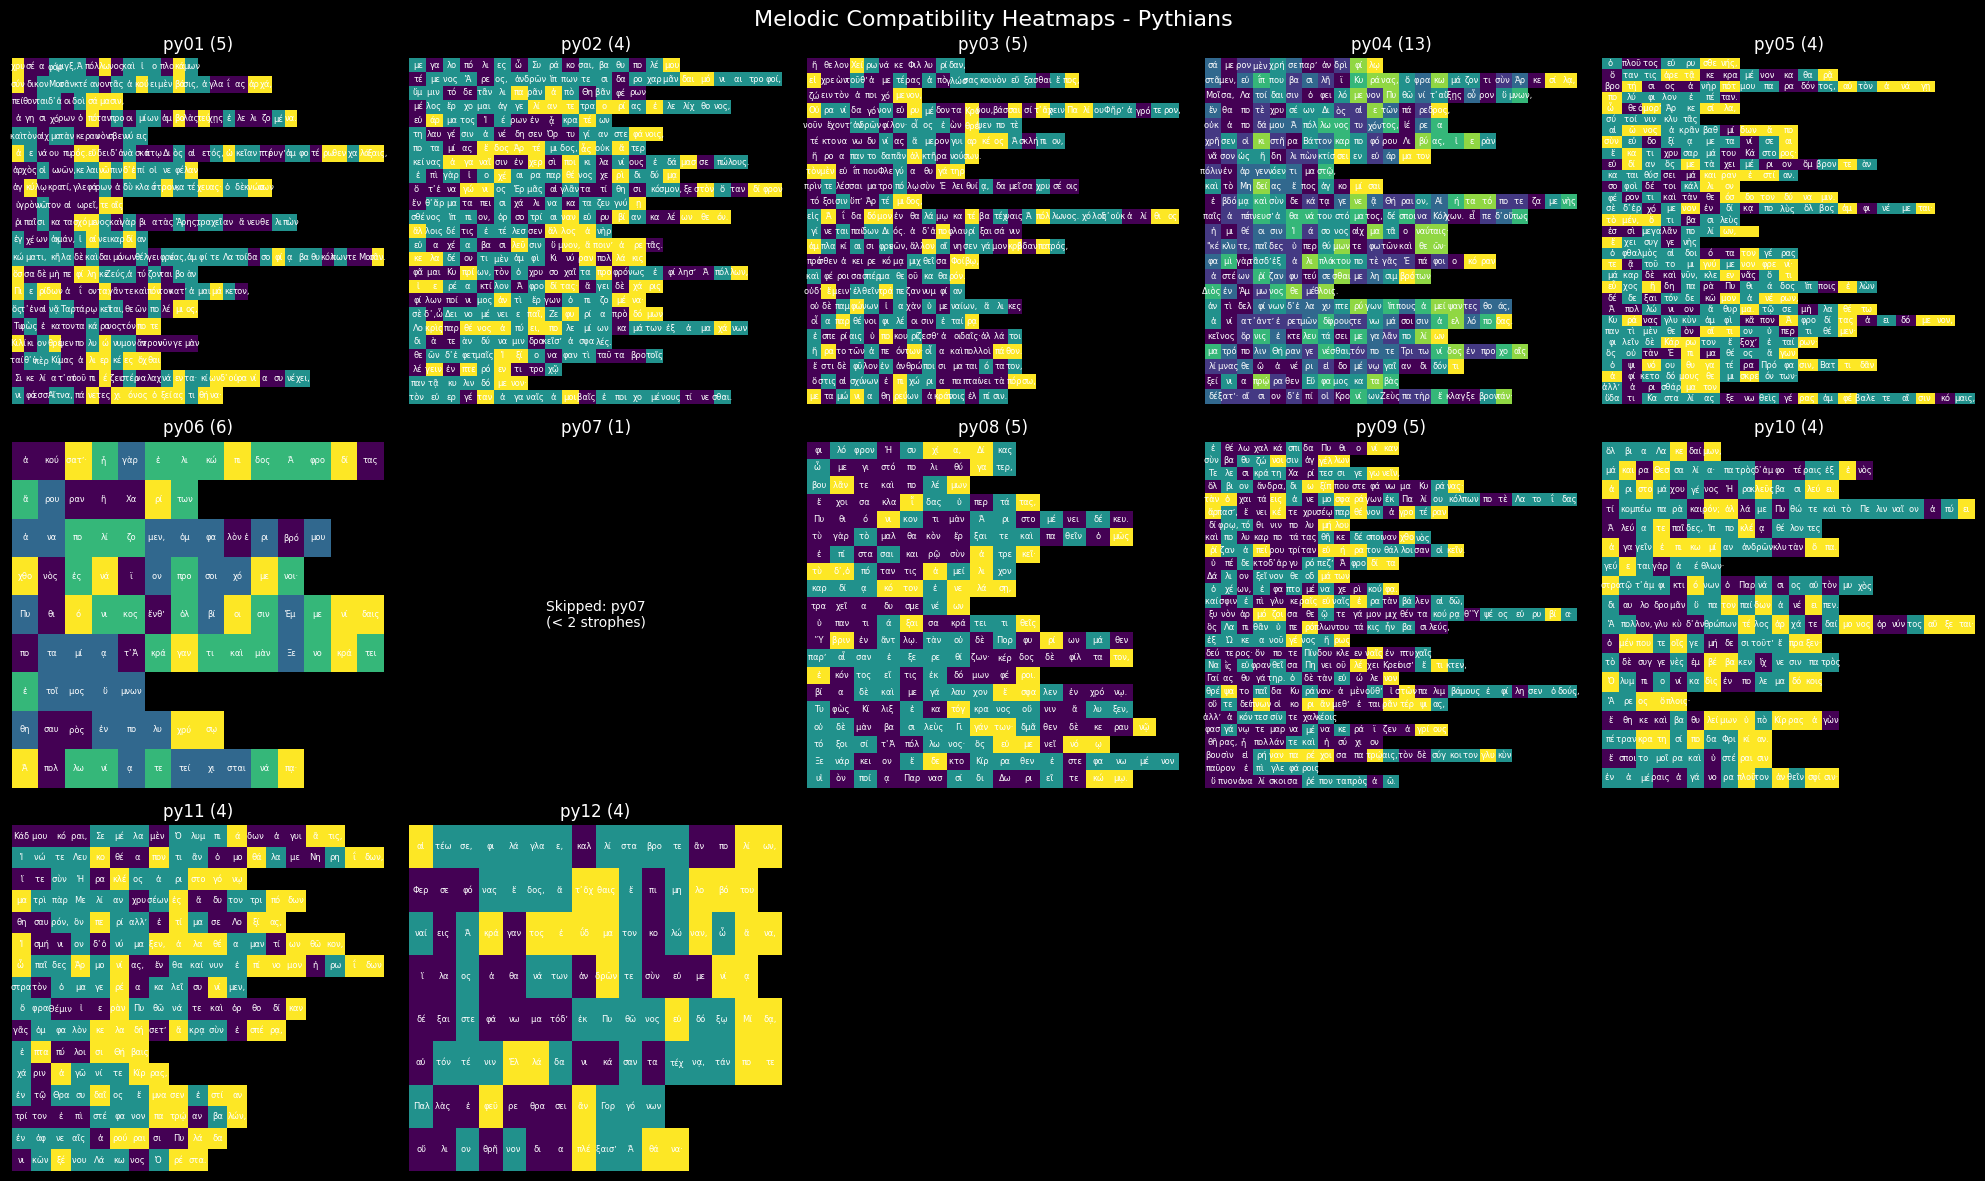

In [1]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_pythians_triads.xml', prefix="py", suptitle="Melodic Compatibility Heatmaps - Pythians")